In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
from array import array
import collections

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/'+'xsec_momentum_flux/' 
output_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/Flux/output/'
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')

Welcome to JupyROOT 6.18/04


In [2]:
#!jupyter nbconvert --to script numuCCana_xsec_flux_momentum.ipynb

In [3]:
# initialte ROOT default canvas
ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptTitle(0)
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# Flux variation, systematic

In [4]:
# Load input files
outputdir_png, outputdir_root,outputdir_pdf = NuCC.prepareOutput2(outputdir)
print outputdir_png,outputdir_root,outputdir_pdf

try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
RootFile = ROOT.TFile(output_filedir+"Flux_systematic.root","RECREATE");

#filename_overlay = 'Flux/NuCCana_overlay_flux_small.root'
filename_overlay = 'NuCCana_overlay_V26_weight.root'
filename_data = 'NuCCana_data_V25.root'
filename_ext = 'NuCCana_ext_V25.root'
filename_dirt = 'NuCCana_dirt_V26_weight.root'
    
tree_name = 'numuCCAna'

/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/png/ /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/root/ /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/pdf/


In [5]:
#Open all the trees of the four files (data, ext, dirt, overlay)

data, ext, dirt, overlay = NuCC.openTrees(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
NuCC.printNumberOfEntries(data,ext,dirt,overlay)

pot_overlay = NuCC.getPOT(inputdir,filename_overlay,tree_name)
pot_dirt =  NuCC.getPOT(inputdir,filename_dirt,tree_name)
#V25 files
pot_data =    7.644e+18  # best with tor875
data_trigger = 1838700.0 #2220362.0 #1854495.0 #4743794 # 1987072.0 # E1DCNT_wcut
ext_trigger =  18997529.0  #2120135 #5685315 # EXT

print 'POT: '
print 'Data:\t\t', pot_data
print 'Ext:\t\t', 0
print 'Overlay:\t', pot_overlay
pot_overlay = 1.22339196540357653e+21
# 1.2233919654e+21
print 'Overlay cott:\t', pot_overlay
print 'Dirt:\t\t', pot_dirt
print ''
sample = [data,ext,overlay,dirt]
scale = {data:1.0,ext:1.0,overlay:1.0,dirt:1.0}
name = {data:'data',ext:'ext',overlay:'overlay',dirt:'dirt'}

scale[data], scale[ext], scale[dirt], scale[overlay] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)

scale[dirt] = scale[dirt]
scale[overlay] = scale[overlay]
print 'Scalefactors: '
print 'Data:\t\t', scale[data]
print 'Ext:\t\t', scale[ext]
print 'Overlay:\t', scale[overlay]
print 'Dirt:\t\t', scale[dirt]


Overlay: Number of Entries:	0
Data: Number of Entries:	28005
Ext: Number of Entries:		222702
Dirt: Number of Entries:	40808

POT: 
Data:		7.644e+18
Ext:		0
Overlay:	0.0
Overlay cott:	1.2233919654e+21
Dirt:		1.25019694173e+20

Scalefactors: 
Data:		1.0
Ext:		0.0967862715198
Overlay:	0.00624820189781
Dirt:		0.0611423668132


Error in <TFile::TFile>: file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/NuCCana_overlay_V26_weight.root does not exist
Error in <TFile::TFile>: file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/NuCCana_overlay_V26_weight.root does not exist


In [6]:
if 1:
    filename_overlay = filename_overlay+'out4.root'
    #filename_overlay = 'NuCCana_overlay_points_1kev.rootout2.root'
    filename_data = filename_data+'out4.root'
    filename_ext = filename_ext+'out4.root'
    filename_dirt = filename_dirt+'out4.root'

    tree_name = 't_out'

    data_out, ext_out, dirt_out, overlay_out = NuCC.openTreesOut(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
    NuCC.printNumberOfEntries(data_out,ext_out,dirt_out,overlay_out)

    sample_out = [data_out,ext_out,overlay_out,dirt_out]
    scale_out = {data_out:1.0,ext_out:1.0,overlay_out:1.0,dirt_out:1.0}
    name_out = {data_out:'data',ext_out:'ext',overlay_out:'overlay',dirt_out:'dirt'}

    scale_out[data_out], scale_out[ext_out], scale_out[dirt_out], scale_out[overlay_out] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
    scale_out[dirt_out] = scale_out[dirt_out]
    scale_out[overlay_out] = scale_out[overlay_out]

Overlay: Number of Entries:	0
Data: Number of Entries:	28004
Ext: Number of Entries:		222701
Dirt: Number of Entries:	40800



Error in <TFile::TFile>: file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/NuCCana_overlay_V26_weight.rootout4.root does not exist


In [7]:
##### flux and number of tragets parameters###
flux = 1.16859e11/1.592e20 # flux per POT per cm2
print flux
flux = 7.3789785277e-10
print flux
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

7.34038944724e-10
7.3789785277e-10
Fiducial Volume:  49184671.35
Beam flux = 5.64049e+09  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [8]:
path_flux = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/Flux/flux_histos_corr/'
f_flux = ROOT.TFile.Open(path_flux+"Tot_All_fluxhisto.root", 'read')
NumberOfFiles = 4815#499+499+483+492+497+387
POT_file = 5e8
fidVol_Area = 236.35 * 213.0

flux_cv = 7.3789785277e-10
h_flux_cv_file = f_flux.Get('numu/numu_CV_FV_TPC')
flux_cv_file = h_flux_cv_file.Integral(0,201)/(NumberOfFiles*POT_file*fidVol_Area)
print flux_cv , flux_cv_file, 1-flux_cv_file/flux_cv

7.3789785277e-10 7.38315746897e-10 -0.000566330590827


In [9]:
path = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/Flux/zarko/'
f_flux = ROOT.TFile.Open(path+"MCC9_FluxHist_volTPCActive.root", 'read')
h_cv = f_flux.Get("hEnumu_cv")

NumberOfFiles = 5000#4815#499+499+483+492+497+387
POT_file = 5e8
fidVol_Area = 128.175*2*116.5*2 #236.35 * 213.0
#active_Area = 128.175*2*116.5*2

flux_cv = 7.3789785277e-10
h_flux_cv_file = f_flux.Get("hEnumu_cv")
flux_cv_file = h_flux_cv_file.Integral(0,201)/(NumberOfFiles*POT_file*fidVol_Area)
print flux_cv , flux_cv_file, 1-flux_cv_file/flux_cv

7.3789785277e-10 7.37180333687e-10 0.000972382667705


In [10]:
def draw_adding():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/30.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()

    pot_latex = ROOT.TLatex(.10, .92,'Accumulated POT: '+str(pot_data)) 
    pot_latex.SetTextFont(62);
    pot_latex.SetTextColor(ROOT.kGray+2);
    pot_latex.SetNDC();
    pot_latex.SetTextSize(1/30.);
    pot_latex.SetTextAlign(10) #;//left adjusted
    pot_latex.Draw();
    
    return prelim, pot_latex

def draw_sim():
    prelim = ROOT.TLatex(0.9,0.93, "MicroBooNE Simulation Preliminary");
    prelim.SetTextFont(62);
    prelim.SetTextColor(ROOT.kGray+2);
    prelim.SetNDC();
    prelim.SetTextSize(1/30.);
    prelim.SetTextAlign(32);
    #prelim.SetTextSize(0.04631579);
    prelim.Draw()
    
    return prelim

In [11]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [12]:
weight_list_flux = [ 'expskin_FluxUnisim', 'horncurrent_FluxUnisim', 'kminus_PrimaryHadronNormalization', 'kplus_PrimaryHadronFeynmanScaling',\
    'kzero_PrimaryHadronSanfordWang', 'nucleoninexsec_FluxUnisim', 'nucleonqexsec_FluxUnisim', 'nucleontotxsec_FluxUnisim',\
    'piminus_PrimaryHadronSWCentralSplineVariation', 'pioninexsec_FluxUnisim', 'pionqexsec_FluxUnisim', 'piontotxsec_FluxUnisim',\
    'piplus_PrimaryHadronSWCentralSplineVariation' ]

num_para = len(weight_list_flux)
print 'Nuber of parameters: ',num_para

Nuber of parameters:  13


In [13]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
num_universes = 100
eff_uni = np.zeros((num_para,num_universes))
mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
binnum = len(mom_bins) - 1

In [14]:
path = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/Flux_100/root_output/'
f = {}
for i in range(num_para):
    f[i] = ROOT.TFile.Open(path+weight_list_flux[i]+"_Flux_systematic.root", 'read')

In [15]:

h_ext_mom = f[0].Get("h_ext_mom")
h_data_mom = f[0].Get("h_data_mom")
h_dirt_mom = f[0].Get("h_dirt_mom")

bkg_ext = h_ext_mom.Integral(0,binnum+1)
num_data = h_data_mom.Integral(0,binnum+1)
bkg_dirt = h_dirt_mom.Integral(0,binnum+1)

print 'Data: ', num_data,' Ext: ', bkg_ext,' Dirt: ',bkg_dirt


Data:  1348.0  Ext:  142.179032326  Dirt:  32.1298244409


In [16]:

h_1d = []
h_1d_true = []

for para in range(num_para):
    h_1d.append([])
    h_1d_true.append([])
    for uni in range(num_universes):
        h_1d[para].append(f[para].Get('h_1d['+str(0)+']['+str(uni)+']'))
        h_1d_true[para].append( f[para].Get('h_1d_true['+str(0)+']['+str(uni)+']' ))

for para in range(num_para): 
    print 'Get efficiency of Parameter: ', weight_list_flux[para]
    for uni in range(num_universes):
        num_signal = h_1d[para][uni].Integral(0,binnum+1)
        num_true = h_1d_true[para][uni].Integral(0,binnum+1)
        eff_uni[para][uni] = num_signal/(num_true+0.0001)
print 'Total std of efficiency (all parameters, all universes)',eff_uni.std()

Get efficiency of Parameter:  expskin_FluxUnisim
Get efficiency of Parameter:  horncurrent_FluxUnisim
Get efficiency of Parameter:  kminus_PrimaryHadronNormalization
Get efficiency of Parameter:  kplus_PrimaryHadronFeynmanScaling
Get efficiency of Parameter:  kzero_PrimaryHadronSanfordWang
Get efficiency of Parameter:  nucleoninexsec_FluxUnisim
Get efficiency of Parameter:  nucleonqexsec_FluxUnisim
Get efficiency of Parameter:  nucleontotxsec_FluxUnisim
Get efficiency of Parameter:  piminus_PrimaryHadronSWCentralSplineVariation
Get efficiency of Parameter:  pioninexsec_FluxUnisim
Get efficiency of Parameter:  pionqexsec_FluxUnisim
Get efficiency of Parameter:  piontotxsec_FluxUnisim
Get efficiency of Parameter:  piplus_PrimaryHadronSWCentralSplineVariation
Total std of efficiency (all parameters, all universes) 0.0010431183342781813


In [17]:

bkg_uni = np.zeros((num_para,num_universes))
h_1d_bkg = []
for para in range(num_para):
    h_1d_bkg.append([])
    for uni in range(num_universes):
        #print 'At universe: ',uni
        h_1d_bkg[para].append( f[i].Get('h_1d_bkg['+str(0)+']['+str(uni)+']') )

for para in range(num_para):
    print 'Get background of Parameter: ', weight_list_flux[para]
    for uni in range(num_universes):
        bkg_uni[para][uni] = h_1d_bkg[para][uni].Integral(0,binnum+1)
        #print 'Parameter: ', weight_list_flux[para], ' Universe: ', uni, ' Overlay: ',bkg_uni[para][uni]


Get background of Parameter:  expskin_FluxUnisim
Get background of Parameter:  horncurrent_FluxUnisim
Get background of Parameter:  kminus_PrimaryHadronNormalization
Get background of Parameter:  kplus_PrimaryHadronFeynmanScaling
Get background of Parameter:  kzero_PrimaryHadronSanfordWang
Get background of Parameter:  nucleoninexsec_FluxUnisim
Get background of Parameter:  nucleonqexsec_FluxUnisim
Get background of Parameter:  nucleontotxsec_FluxUnisim
Get background of Parameter:  piminus_PrimaryHadronSWCentralSplineVariation
Get background of Parameter:  pioninexsec_FluxUnisim
Get background of Parameter:  pionqexsec_FluxUnisim
Get background of Parameter:  piontotxsec_FluxUnisim
Get background of Parameter:  piplus_PrimaryHadronSWCentralSplineVariation


In [18]:
#h_flux_cv = f_flux.Get('numu/numu_CV_AV_TPC')
h_flux_cv = f_flux.Get("hEnumu_cv") # zarko
beam_flux = h_flux_cv.Integral(-1,201)/(NumberOfFiles*POT_file*fidVol_Area)*pot_data
print beam_flux,NumberOfFiles,POT_file,fidVol_Area,pot_data
active_Area = 128.175*2*116.5*2
beam_zarko = h_flux_cv.Integral(-1,201)/(NumberOfFiles*POT_file*fidVol_Area)
print 'used flux:',7.3789785277e-10 ,'flux zarko: ',beam_zarko,'difference: ',(1-beam_zarko/7.3789785277e-10)*100,'%'

5635006470.71 5000 500000000.0 59729.55 7.644e+18
used flux: 7.3789785277e-10 flux zarko:  7.37180333687e-10 difference:  0.0972382667705 %


In [19]:
'''Number of data: 1289
Number of ext: 133.661840969
Number of dirt: 31.9980107374
Number of overlay: 195.338007631
Number of overlay signal: 934.799917522
Efficiency:  0.503703591423
Total integrated cross section: 7.96017400836e-39'''

n_data = 1348.0
n_ext = 142.179031156 
n_dirt = 32.1298248268
n_overlay = 199.823289107
eff = 0.556227829903

h_flux_cv = f_flux.Get("hEnumu_cv") # zarko
beam_flux = h_flux_cv.Integral(-1,201)/(NumberOfFiles*POT_file*active_Area)*pot_data

xsec_CV = (n_data-n_ext-n_dirt-n_overlay)/(eff*N_tot*beam_flux)
print xsec_CV

7.57213683609e-39


In [20]:
# add all errors up....
xsec_uni = np.zeros((num_para,num_universes))
h_1d_xsec = []
for para in range(num_para):
    h_1d_xsec.append([])
    for uni in range(num_universes):
        #print 'At universe: ',uni
        h_1d_xsec[para].append( ROOT.TH1F('h_1d_xsec['+str(para)+']['+str(uni)+']',"xsec momentum",binnum,array('f',mom_bins)) )
        
#num_universes = 1000

flux_diff = np.zeros((num_para,num_universes))
sigma_tot_all = 0.0
xsec_diff_all = np.zeros((num_para,num_universes))
for para in range(num_para):
    sigma_tot = 0.0
    for uni in range(num_universes):
        #signal = num_data - bkg_ext - bkg_dirt - bkg_uni[para][uni]
        #h_flux_var = f_flux.Get('numu/'+weight_list_flux[para]\
        #                        +'/Active_TPC_Volume/numu_'+weight_list_flux[para]\
        #                        +'_Uni_'+str(uni)+'_AV_TPC')
        h_flux_var = f_flux.Get('numu_ms_'+weight_list_flux[para]\
                                +'/hEnumu_'+weight_list_flux[para]\
                                +'_ms_'+str(uni))
        flux_var = h_flux_var.Integral(-1,201)
        flux_var = flux_var/(NumberOfFiles*POT_file*active_Area)*pot_data
        flux_diff[para][uni] = (flux_var)
        xsec_uni[para][uni] = (n_data - n_ext - n_dirt - bkg_uni[para][uni])/(eff_uni[para][uni] * N_tot * flux_var)
        #xsec_uni[para][uni] = (n_data-n_ext-n_dirt-n_overlay)/(eff*N_tot * flux_var)
        xsec_diff = xsec_uni[para][uni] - xsec_CV
        sigma = xsec_diff*xsec_diff
        xsec_diff_all[para][uni] = xsec_diff
        sigma_tot = sigma_tot + sigma
    sigma_tot = sigma_tot/num_universes
    sigma_tot_all = sigma_tot_all + sigma_tot
    print weight_list_flux[para],'\t& {0:0.5g}'.format(np.mean(xsec_uni[para])), '\t& {0:0.5g}'.format(math.sqrt(sigma_tot)),\
            ' & {0:0.3f}\%'.format(math.sqrt(sigma_tot)/xsec_CV*100.0)
    #print ''
    
sigma_tot_all = math.sqrt(sigma_tot_all)
print 'Total flux errorin percent: {0:0.3f}%'.format(sigma_tot_all*100.0/xsec_CV,'%')
##print 'Total flux errorin percent: {0:0.5f}%'.format(math.sqrt(sigma_tot_all),'%')
#print 'data,ext,dirt,n_tot,flux',num_data,bkg_ext,bkg_dirt,N_tot,beam_flux

expskin_FluxUnisim 	& 7.5775e-39 	& 2.3244e-40  & 3.070\%
horncurrent_FluxUnisim 	& 7.5645e-39 	& 7.4778e-41  & 0.988\%
kminus_PrimaryHadronNormalization 	& 7.5635e-39 	& 6.3827e-41  & 0.843\%
kplus_PrimaryHadronFeynmanScaling 	& 7.5644e-39 	& 6.5899e-41  & 0.870\%
kzero_PrimaryHadronSanfordWang 	& 7.5636e-39 	& 6.3989e-41  & 0.845\%
nucleoninexsec_FluxUnisim 	& 7.5478e-39 	& 9.3879e-41  & 1.240\%
nucleonqexsec_FluxUnisim 	& 7.549e-39 	& 1.9227e-40  & 2.539\%
nucleontotxsec_FluxUnisim 	& 7.559e-39 	& 7.396e-41  & 0.977\%
piminus_PrimaryHadronSWCentralSplineVariation 	& 7.5629e-39 	& 6.384e-41  & 0.843\%
pioninexsec_FluxUnisim 	& 7.5557e-39 	& 1.0169e-40  & 1.343\%
pionqexsec_FluxUnisim 	& 7.5636e-39 	& 8.4027e-41  & 1.110\%
piontotxsec_FluxUnisim 	& 7.5633e-39 	& 8.0082e-41  & 1.058\%
piplus_PrimaryHadronSWCentralSplineVariation 	& 6.9493e-39 	& 7.23e-40  & 9.548\%
Total flux errorin percent: 10.842%


In [21]:
# check standard deviations on the true efficiency
#np.std(eff_uni)
#Since the efficiency does not change very much per universe the nominal efficiency e_tilde is used
# in order not to calculated the whole detector smearing again
#eff_tilde = np.load('/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_filesV4/'+'eff_tilde_momentum_xsec_CV.npy')
#print input_filedir
#print eff_tilde

In [22]:
h_eff_true = []
h_eff_tilde = []

for para in range(num_para):
    h_eff_true.append([])
    h_eff_tilde.append([])
    for uni in range(num_universes):
        h_eff_true[para].append(f[para].Get('h_eff_true['+str(uni)+']'))
        h_eff_tilde[para].append( f[para].Get('h_eff_tilde['+str(uni)+']' ))
#h_eff_tilde[0][0].Draw()
#c1.Draw()

In [23]:

for para in range(num_para):
    xsec_uni_bin = np.zeros((num_universes,binnum))
    for uni in range(num_universes):
        for i in range(binnum):
            xsec_uni_bin[uni][i] = h_data_mom.GetBinContent(i+1) - h_ext_mom.GetBinContent(i+1) - h_dirt_mom.GetBinContent(i+1) - h_1d_bkg[para][uni].GetBinContent(i+1)
            xsec_uni_bin[uni][i] = xsec_uni_bin[uni][i]/(h_eff_tilde[para][uni].GetBinContent(i+1) * N_tot * beam_flux * h_data_mom.GetBinWidth(i+1))
    #print xsec_uni_bin

    xsec_std_bin = np.std(xsec_uni_bin,axis=0)
    #print xsec_std_bin
    np.save(output_filedir+'xsec_'+weight_list_flux[para]+'_momentum',xsec_std_bin)

In [24]:
# save the total difference in percent
np.save(output_filedir+'xsec_percent_diff_momentum',xsec_std_bin)

In [25]:
# close the root file with all the histos
RootFile.Close()

In [26]:
# load cv values
path_cv = '/home/tmettler/Desktop/ub_data/mcc9.1/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_filesV4/'
f_cv = ROOT.TFile.Open(path_cv+"xsec_momentum_wighted.root", 'read')

h_cv = f_cv.Get('h_xsec_data')
h_overlay_cv = f_cv.Get('h_overlay')

In [27]:
# initialte ROOT default canvas
#ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptTitle(0)
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


100


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/png/h_1d_xsec_all_flux.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/root/h_1d_xsec_all_flux.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/pdf/h_1d_xsec_all_flux.pdf has been created


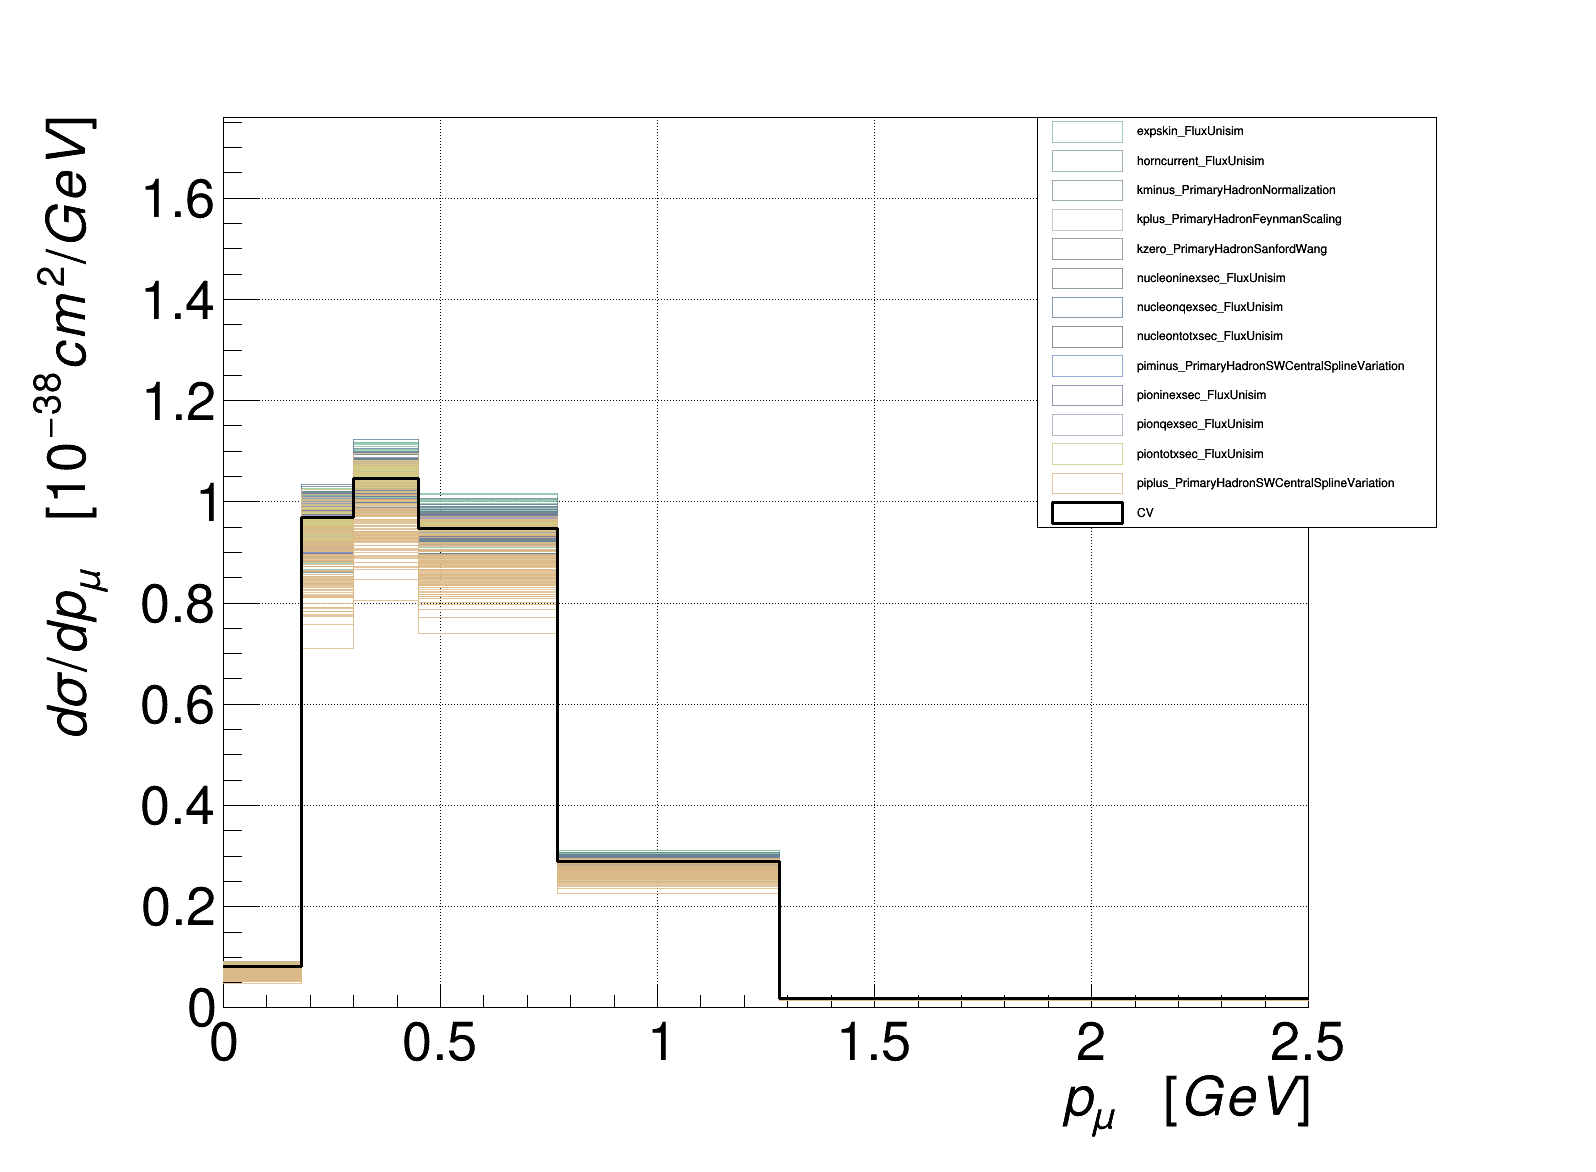

In [28]:
h_1d_xsec = []
print num_universes
for para in range(num_para):
    h_1d_xsec.append([])
    for uni in range(num_universes):
        #print 'At universe: ',uni
        h_1d_xsec[para].append( ROOT.TH1F('h_1d_xsec['+str(para)+']['+str(uni)+']',"xsec momentum",binnum,array('f',mom_bins)) )

legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
#legend = ROOT.TLegend(0.15,0.65,0.3,0.9) # LEGEND LEFT    weight_list_flux[para]    

for para in range(num_para):
    for uni in range(num_universes):     
        h_1d_xsec[para][uni] = h_data_mom.Clone()
        h_1d_xsec[para][uni].Add(h_ext_mom,-1)
        h_1d_xsec[para][uni].Add(h_dirt_mom,-1)
        h_1d_xsec[para][uni].Add(h_1d_bkg[para][uni],-1)
        
        #h_flux_var = f_flux.Get('numu/'+weight_list_flux[para]\
        #                        +'/Active_TPC_Volume/numu_'+weight_list_flux[para]\
        #                        +'_Uni_'+str(uni)+'_FV_TPC')
        #flux_var = h_flux_var.Integral(0,201)
        h_flux_var = f_flux.Get('numu_ms_'+weight_list_flux[para]\
                                +'/hEnumu_'+weight_list_flux[para]\
                                +'_ms_'+str(uni))
        flux_var = h_flux_var.Integral(-1,201)
        flux_var = flux_var/(NumberOfFiles*POT_file*fidVol_Area)*pot_data
        
        h_1d_xsec[para][uni].Scale(1.0/(N_tot * flux_var))
        h_1d_xsec[para][uni].SetLineColorAlpha(para+30,0.8)
        h_1d_xsec[para][uni].SetLineWidth(1)
        for i in range(1,binnum+1):
            value = h_1d_xsec[para][uni].GetBinContent(i)
            width = h_1d_xsec[para][uni].GetBinWidth(i)
            h_1d_xsec[para][uni].SetBinContent(i,value/(width*h_eff_tilde[para][uni].GetBinContent(i)))
            #print i, value/width
        h_1d_xsec[para][uni].Scale(1e38)
    legend.AddEntry(h_1d_xsec[para][uni],weight_list_flux[para],"f")
    
legend.AddEntry(h_cv,'CV',"f")
h_cv.SetLineWidth(3)
h_cv.SetMaximum(h_cv.GetMaximum()*1.1)
h_cv.Draw('HIST')
for para in range(num_para):
    for uni in range(num_universes):        
        h_1d_xsec[para][uni].Draw('HIST same ')
legend.Draw()
h_cv.Draw('HIST same')
c1.Draw()
c1.SaveAs(outputdir_png + "h_1d_xsec_all_flux.png")
c1.SaveAs(outputdir_root + "h_1d_xsec_all_flux.root")
c1.SaveAs(outputdir_pdf + "h_1d_xsec_all_flux.pdf")

In [29]:
print len(h_1d_xsec[1])
# initialte ROOT default canvas
#ROOT.gROOT.SetBatch(ROOT.kTRUE)
ROOT.gStyle.SetOptTitle(0)
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

100


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/png/h_1d_bkg_all_flux.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/root/h_1d_bkg_all_flux.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/pdf/h_1d_bkg_all_flux.pdf has been created


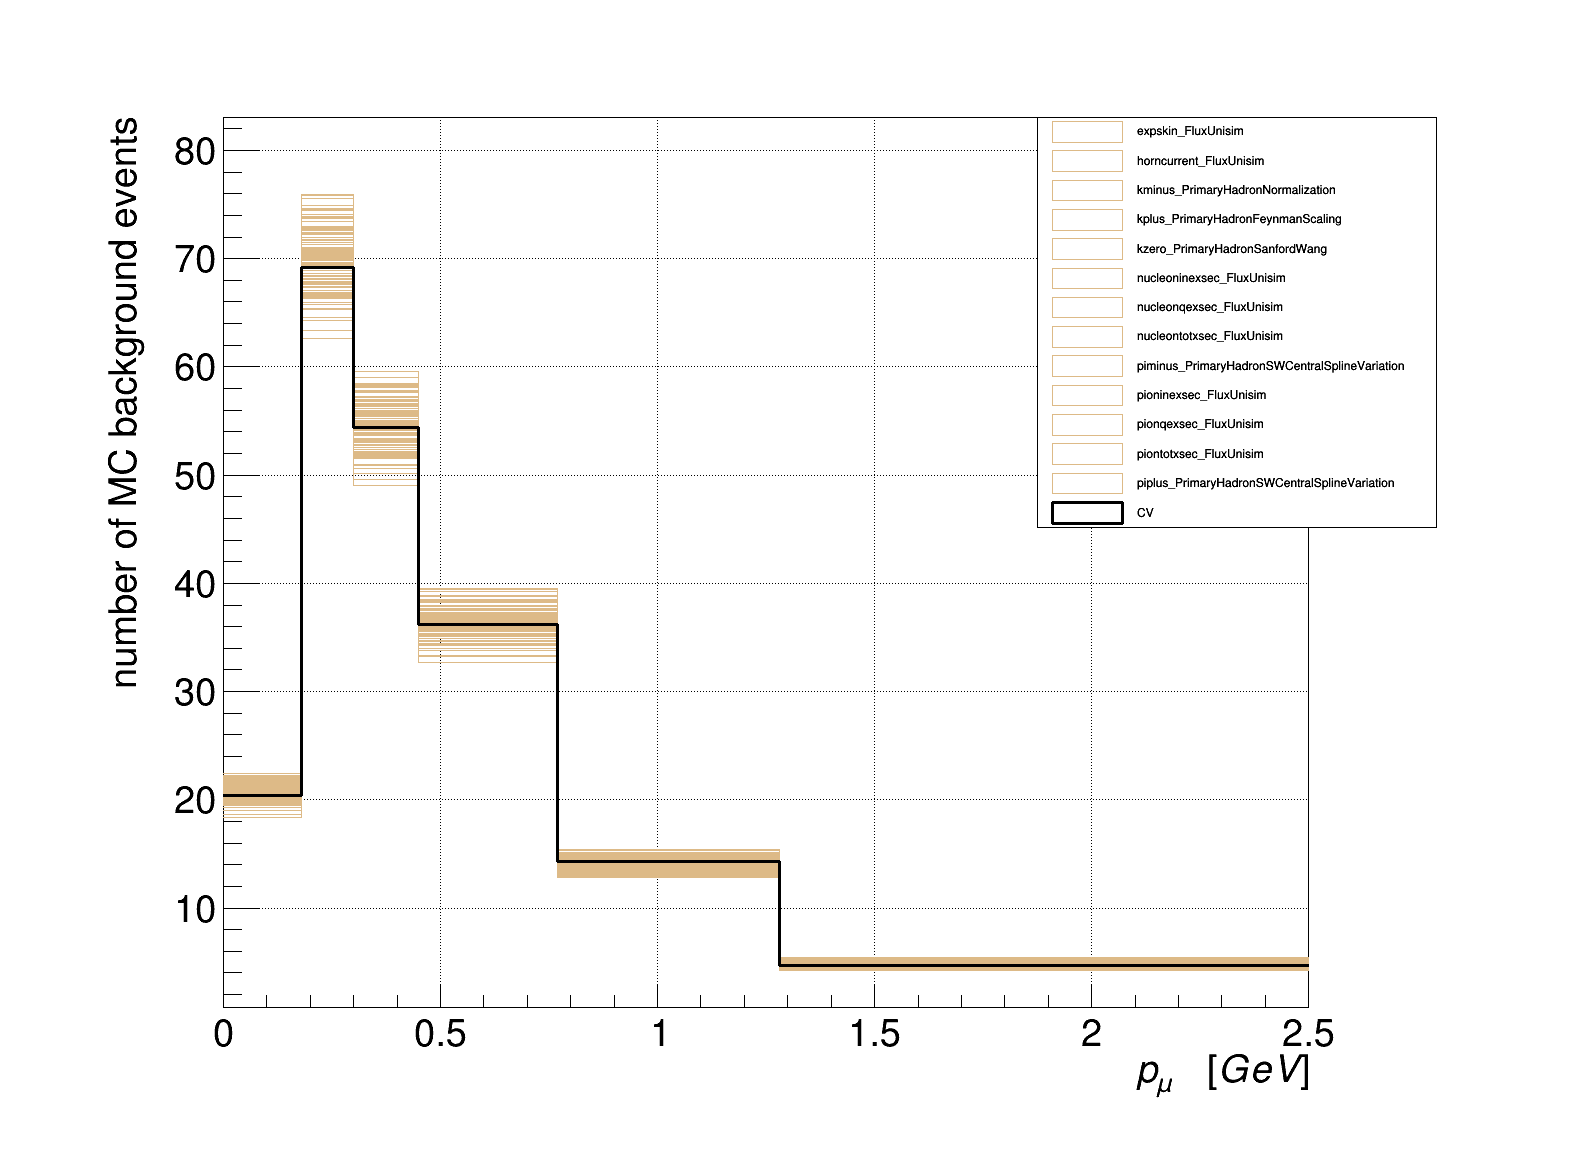

In [30]:
legend = ROOT.TLegend(0.65,0.55,0.9,0.9); #LEGEND RIGHT
h_overlay_cv.SetLineWidth(3)
h_overlay_cv.SetLineColor(1)
h_overlay_cv.SetYTitle("number of MC background events")
h_overlay_cv.SetXTitle("p_{\mu} \t [GeV]")
h_overlay_cv.SetMaximum(h_overlay_cv.GetMaximum()*1.2)
h_overlay_cv.Draw('HIST')
for para in range(num_para):
    for uni in range(num_universes):   
        h_1d_bkg[para][uni].SetLineColor(para+30)
        h_1d_bkg[para][uni].SetLineWidth(1)
        h_1d_bkg[para][uni].Draw('HIST same')
    legend.AddEntry(h_1d_bkg[para][uni],weight_list_flux[para],"f")
legend.AddEntry(h_overlay_cv,'CV',"f")        
legend.Draw()
h_overlay_cv.Draw('HIST same')
c1.Draw()
c1.SaveAs(outputdir_png + "h_1d_bkg_all_flux.png")
c1.SaveAs(outputdir_root + "h_1d_bkg_all_flux.root")
c1.SaveAs(outputdir_pdf + "h_1d_bkg_all_flux.pdf")

In [31]:
'''# ROOT.TH1F('h_1d_xsec['+str(para)+']['+str(uni)+']',"xsec momentum",binnum,array('f',mom_bins)) )
mom_binsy = [ 0.00, 1e-39,2e-39, 3e-39 ]
mom_binsy = np.arange(0, 3e-39, 0.1e-39).tolist()
binnumy = len(mom_binsy) - 1
xsec_col = ROOT.TH2F('xsec_col','Fluxreweighting',binnum,array('f',mom_bins),binnumy, array('f',mom_binsy))
#h_1d_xsec[0][0].Draw()
for para in range(1):
    for uni in range(num_universes):        
        h_1d_xsec[para][uni].Draw('HIST same ')
'''

'# ROOT.TH1F(\'h_1d_xsec[\'+str(para)+\'][\'+str(uni)+\']\',"xsec momentum",binnum,array(\'f\',mom_bins)) )\nmom_binsy = [ 0.00, 1e-39,2e-39, 3e-39 ]\nmom_binsy = np.arange(0, 3e-39, 0.1e-39).tolist()\nbinnumy = len(mom_binsy) - 1\nxsec_col = ROOT.TH2F(\'xsec_col\',\'Fluxreweighting\',binnum,array(\'f\',mom_bins),binnumy, array(\'f\',mom_binsy))\n#h_1d_xsec[0][0].Draw()\nfor para in range(1):\n    for uni in range(num_universes):        \n        h_1d_xsec[para][uni].Draw(\'HIST same \')\n'

In [32]:
xsec_cov_matrix_all = np.zeros((num_para,binnum,binnum)) # covariance matrix
xsec_corr_matrix = np.zeros((binnum,binnum)) # correlation matrix
xsec_frac_cov_matrix_all = np.zeros((num_para,binnum,binnum)) # fractional covariance matrix

for para in range(num_para):#num_para
    for uni in range(num_universes):    #num_universes 
        xsec_diff_matrix = np.zeros((binnum))
        xsec_diff_matrix_1 = np.zeros((binnum))
        for i in range(1,binnum+1):
            xsec_var = h_1d_xsec[para][uni].GetBinContent(i)
            xsec_cv = h_cv.GetBinContent(i)
            xsec_diff_matrix[i-1] = xsec_var - xsec_cv
            xsec_diff_matrix_1[i-1] = (xsec_var - xsec_cv)/(xsec_cv+1e-80)
        xsec_cov_matrix_all[para] = xsec_cov_matrix_all[para] + xsec_diff_matrix.reshape(binnum,1) * xsec_diff_matrix
        xsec_frac_cov_matrix_all[para] = xsec_frac_cov_matrix_all[para] + xsec_diff_matrix_1.reshape(binnum,1) * xsec_diff_matrix_1
    xsec_cov_matrix_all[para] = xsec_cov_matrix_all[para]/num_universes
    xsec_frac_cov_matrix_all[para] = xsec_frac_cov_matrix_all[para]/num_universes

xsec_cov_matrix = np.zeros((binnum,binnum)) # covariance matrix
xsec_frac_cov_matrix = np.zeros((binnum,binnum)) # correlation matrix

for para in range(num_para):#num_para
    xsec_cov_matrix = xsec_cov_matrix + xsec_cov_matrix_all[para]
    xsec_frac_cov_matrix = xsec_frac_cov_matrix + xsec_frac_cov_matrix_all[para]

for i in range(binnum):
    for j in range(binnum):
        xsec_corr_matrix[i][j] = xsec_cov_matrix[i][j]/(math.sqrt(xsec_cov_matrix[i][i]*xsec_cov_matrix[j][j]))
    

In [33]:
RootFile = ROOT.TFile(output_filedir+"Flux_systematic.root","RECREATE");

710

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/png/h_covariance_flux.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/root/h_covariance_flux.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/pdf/h_covariance_flux.pdf has been created


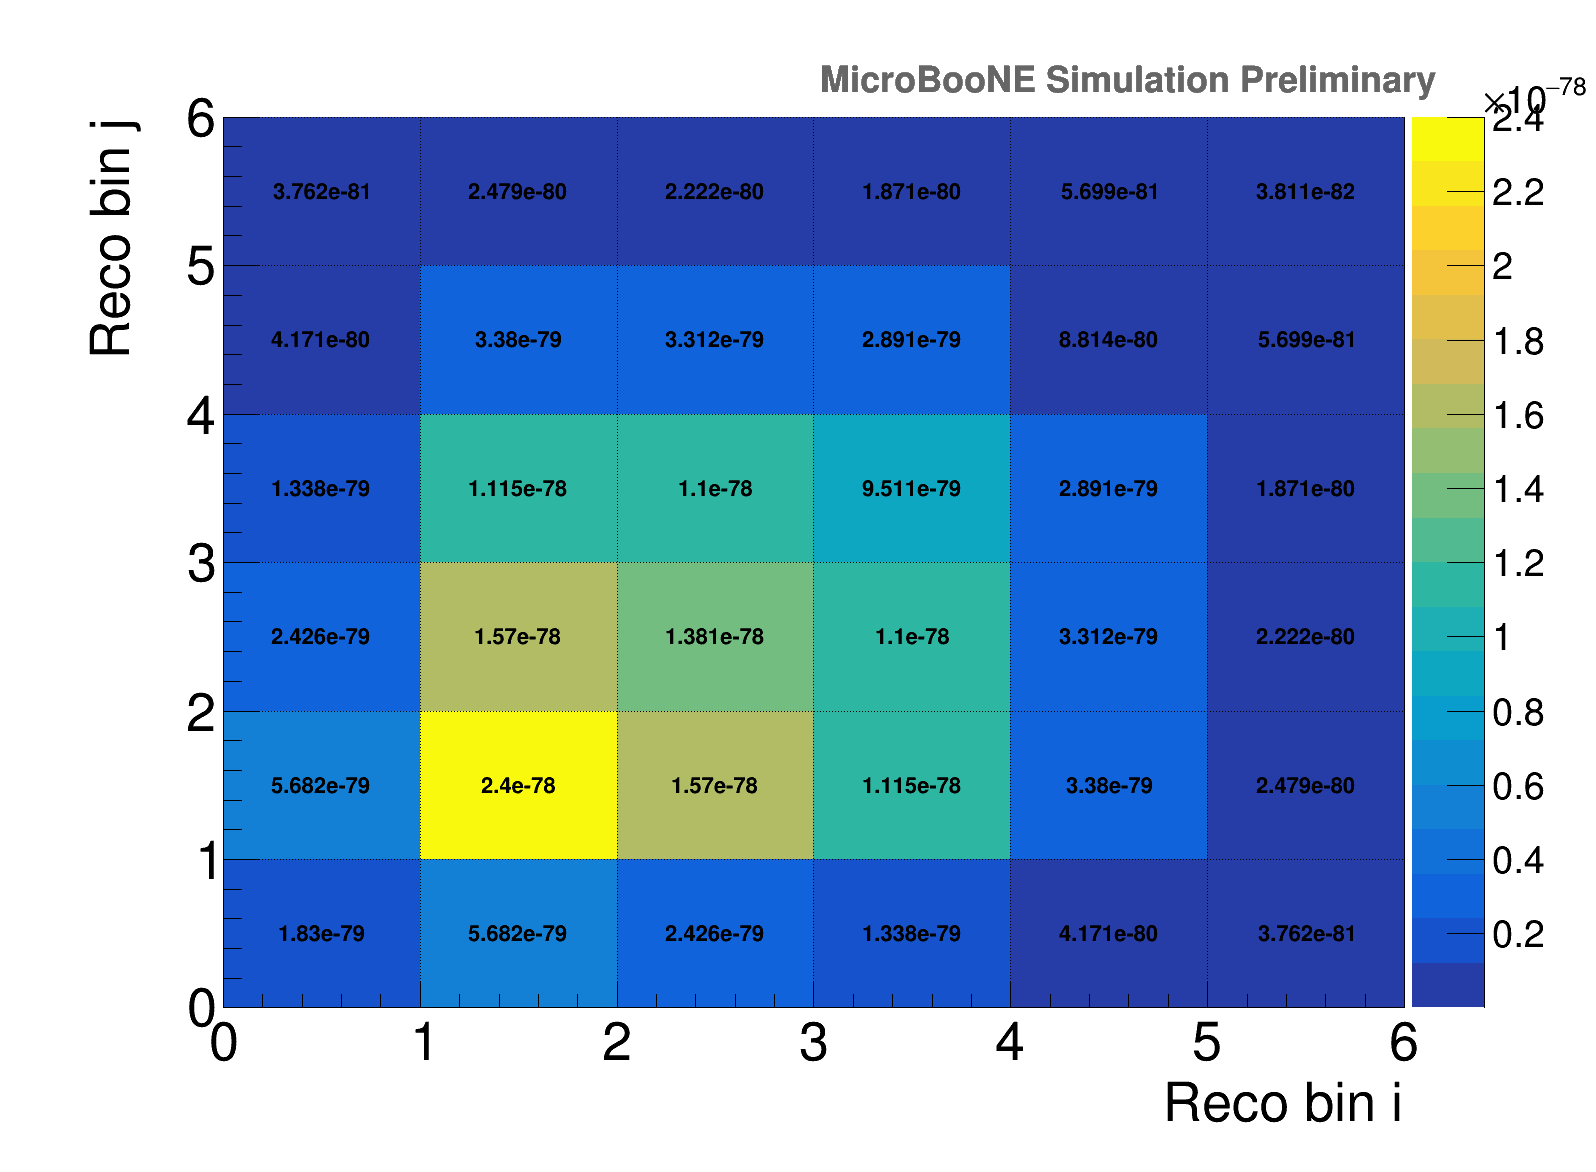

In [34]:
ROOT.gStyle.SetPaintTextFormat('0.3g')
h_covariance = ROOT.TH2D("h_covariance",'Covariance matrix',6,0,6,6,0,6)
for i in range(binnum):
    for j in range(binnum):
        h_covariance.SetBinContent(i+1,j+1,xsec_cov_matrix[i,j]*1e-76)
#h_covariance.SetMinimum(-1)
h_covariance.SetXTitle("Reco bin i")
h_covariance.SetYTitle("Reco bin j")
h_covariance.GetYaxis().SetTitleSize(0.05)
h_covariance.GetYaxis().SetTitleOffset(0.0)
h_covariance.GetYaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleSize(0.05)
h_covariance.GetXaxis().SetLabelSize(0.05)
h_covariance.GetXaxis().SetTitleOffset(1)
h_covariance.SetLineColor(ROOT.kBlack)
h_covariance.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
ROOT.gStyle.SetPaintTextFormat('0.4g')
h_covariance.Draw('colz')
h_covariance.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_covariance_flux.png")
c1.SaveAs(outputdir_root + "h_covariance_flux.root")
c1.SaveAs(outputdir_pdf + "h_covariance_flux.pdf")
h_covariance.Write('h_covariance')

741

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/png/h_frac_covariance_flux.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/root/h_frac_covariance_flux.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/pdf/h_frac_covariance_flux.pdf has been created


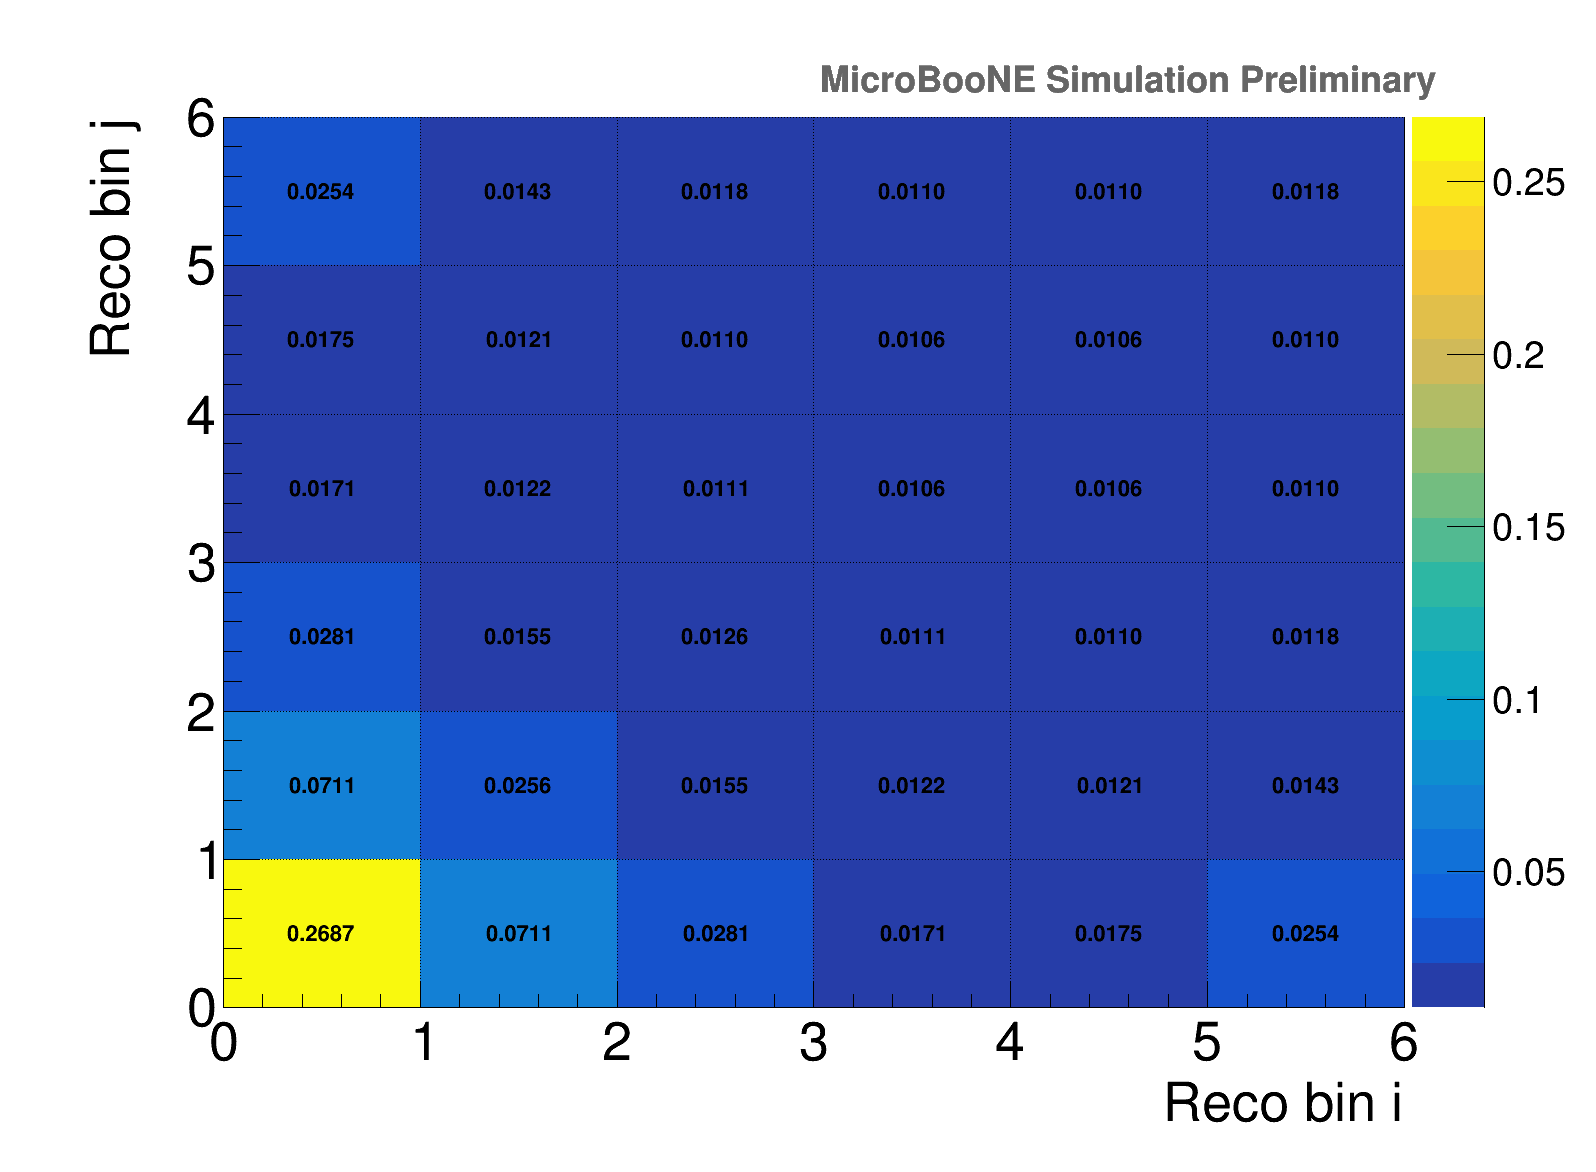

In [35]:
ROOT.gStyle.SetPaintTextFormat('0.5f')
h_frac_covariance = ROOT.TH2D("h_frac_covariance",'Fractional covariance matrix',6,0,6,6,0,6)
for i in range(binnum):
    for j in range(binnum):
        h_frac_covariance.SetBinContent(i+1,j+1,xsec_frac_cov_matrix[i,j])
#h_covariance.SetMinimum(-1)
h_frac_covariance.SetXTitle("Reco bin i")
h_frac_covariance.SetYTitle("Reco bin j")
h_frac_covariance.GetYaxis().SetTitleSize(0.05)
h_frac_covariance.GetYaxis().SetTitleOffset(0.0)
h_frac_covariance.GetYaxis().SetLabelSize(0.05)
h_frac_covariance.GetXaxis().SetTitleSize(0.05)
h_frac_covariance.GetXaxis().SetLabelSize(0.05)
h_frac_covariance.GetXaxis().SetTitleOffset(1)
h_frac_covariance.SetLineColor(ROOT.kBlack)
h_frac_covariance.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.12)
ROOT.gStyle.SetPaintTextFormat('0.4f')
h_frac_covariance.Draw('colz')
h_frac_covariance.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_frac_covariance_flux.png")
c1.SaveAs(outputdir_root + "h_frac_covariance_flux.root")
c1.SaveAs(outputdir_pdf + "h_frac_covariance_flux.pdf")
h_frac_covariance.Write('h_frac_covariance')

678

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/png/h_correlation_flux.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/root/h_correlation_flux.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/pdf/h_correlation_flux.pdf has been created


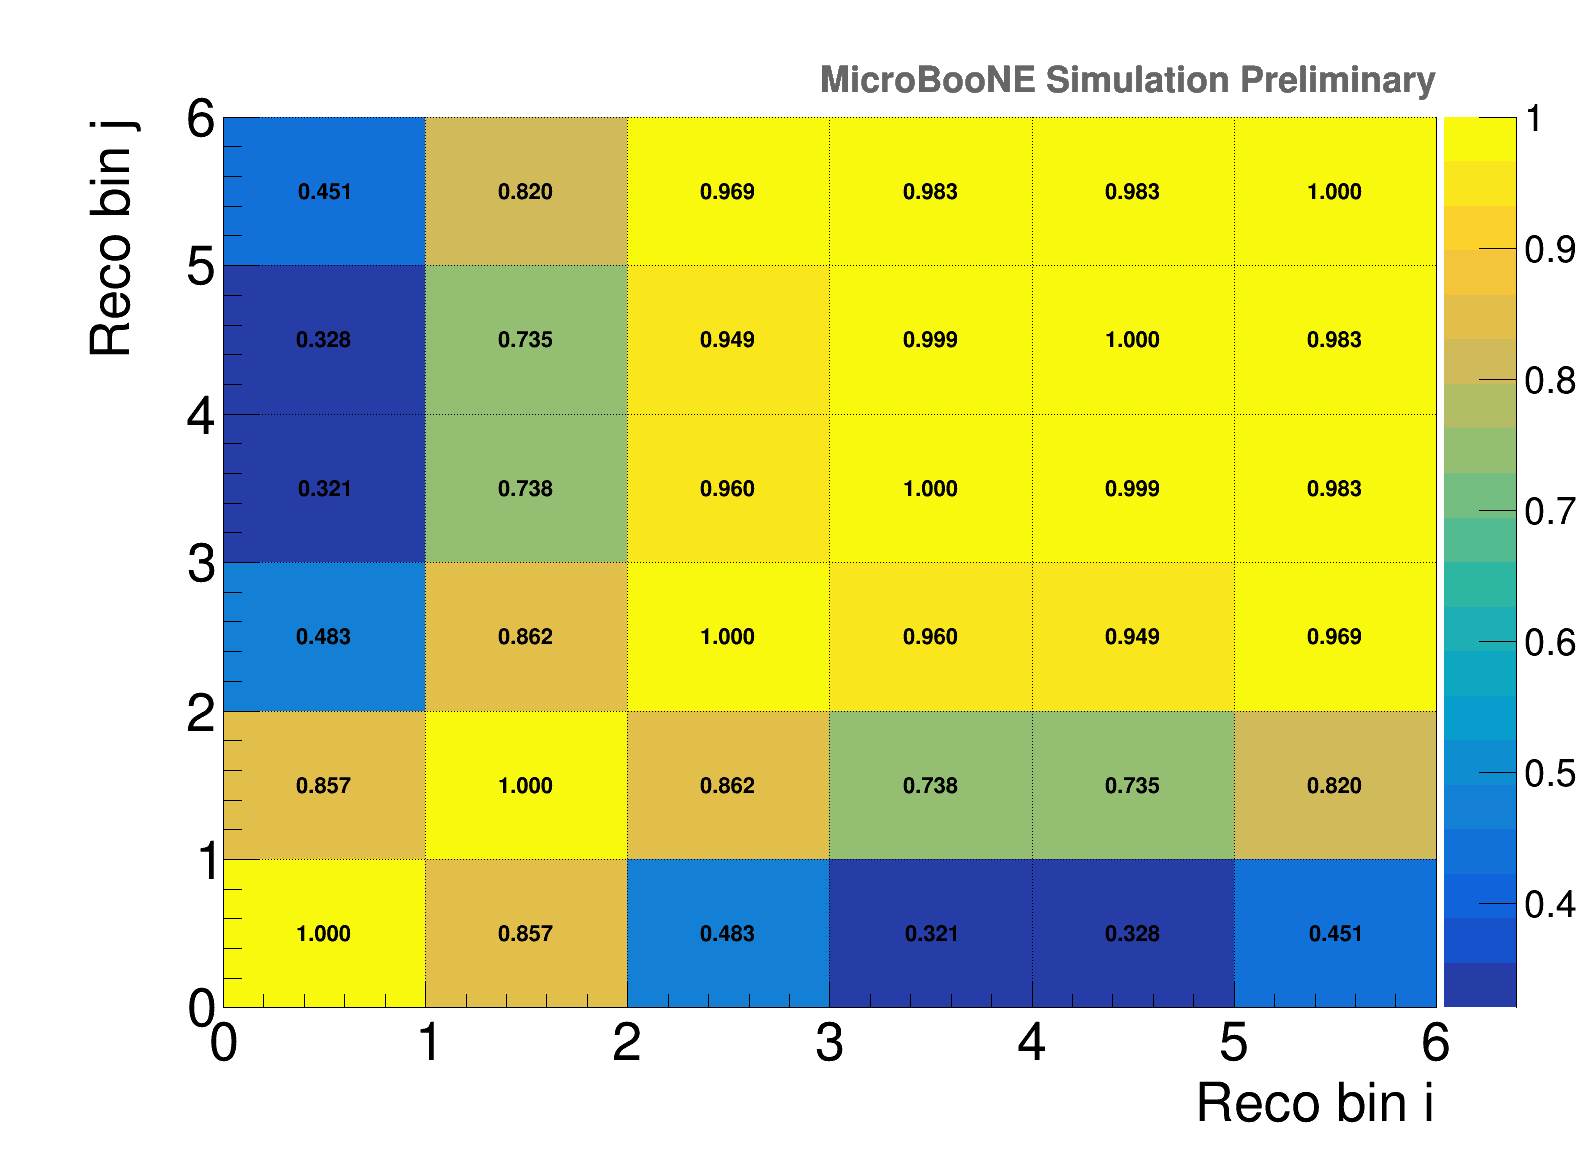

In [36]:
ROOT.gStyle.SetPaintTextFormat('0.3f')
h_correlation = ROOT.TH2D("h_correlation",'Correlation matrix',6,0,6,6,0,6)
for i in range(binnum):
    for j in range(binnum):
        h_correlation.SetBinContent(i+1,j+1,xsec_corr_matrix[i,j])
#h_correlation.SetMinimum(-1)
h_correlation.SetXTitle("Reco bin i")
h_correlation.SetYTitle("Reco bin j")
h_correlation.GetYaxis().SetTitleSize(0.05)
h_correlation.GetYaxis().SetTitleOffset(0.0)
h_correlation.GetYaxis().SetLabelSize(0.05)
h_correlation.GetXaxis().SetTitleSize(0.05)
h_correlation.GetXaxis().SetLabelSize(0.05)
h_correlation.GetXaxis().SetTitleOffset(1)
h_correlation.SetLineColor(ROOT.kBlack)
h_correlation.SetLineWidth(4)
ROOT.gStyle.SetEndErrorSize(5)
c1.SetRightMargin(0.1)
ROOT.gStyle.SetPaintTextFormat('0.3f')
h_correlation.Draw('colz')
h_correlation.Draw('same text')
prelim = draw_sim()
prelim.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_correlation_flux.png")
c1.SaveAs(outputdir_root + "h_correlation_flux.root")
c1.SaveAs(outputdir_pdf + "h_correlation_flux.pdf")
h_correlation.Write('h_correlation')

In [37]:
#h_cv.Scale(1e38)
#for para in range(num_para):
#    for uni in range(num_universes):  
#        h_1d_xsec[para][uni].Scale(1e38)

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/png/h_xsec_flux_stat_error.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/root/h_xsec_flux_stat_error.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/pdf/h_xsec_flux_stat_error.pdf has been created


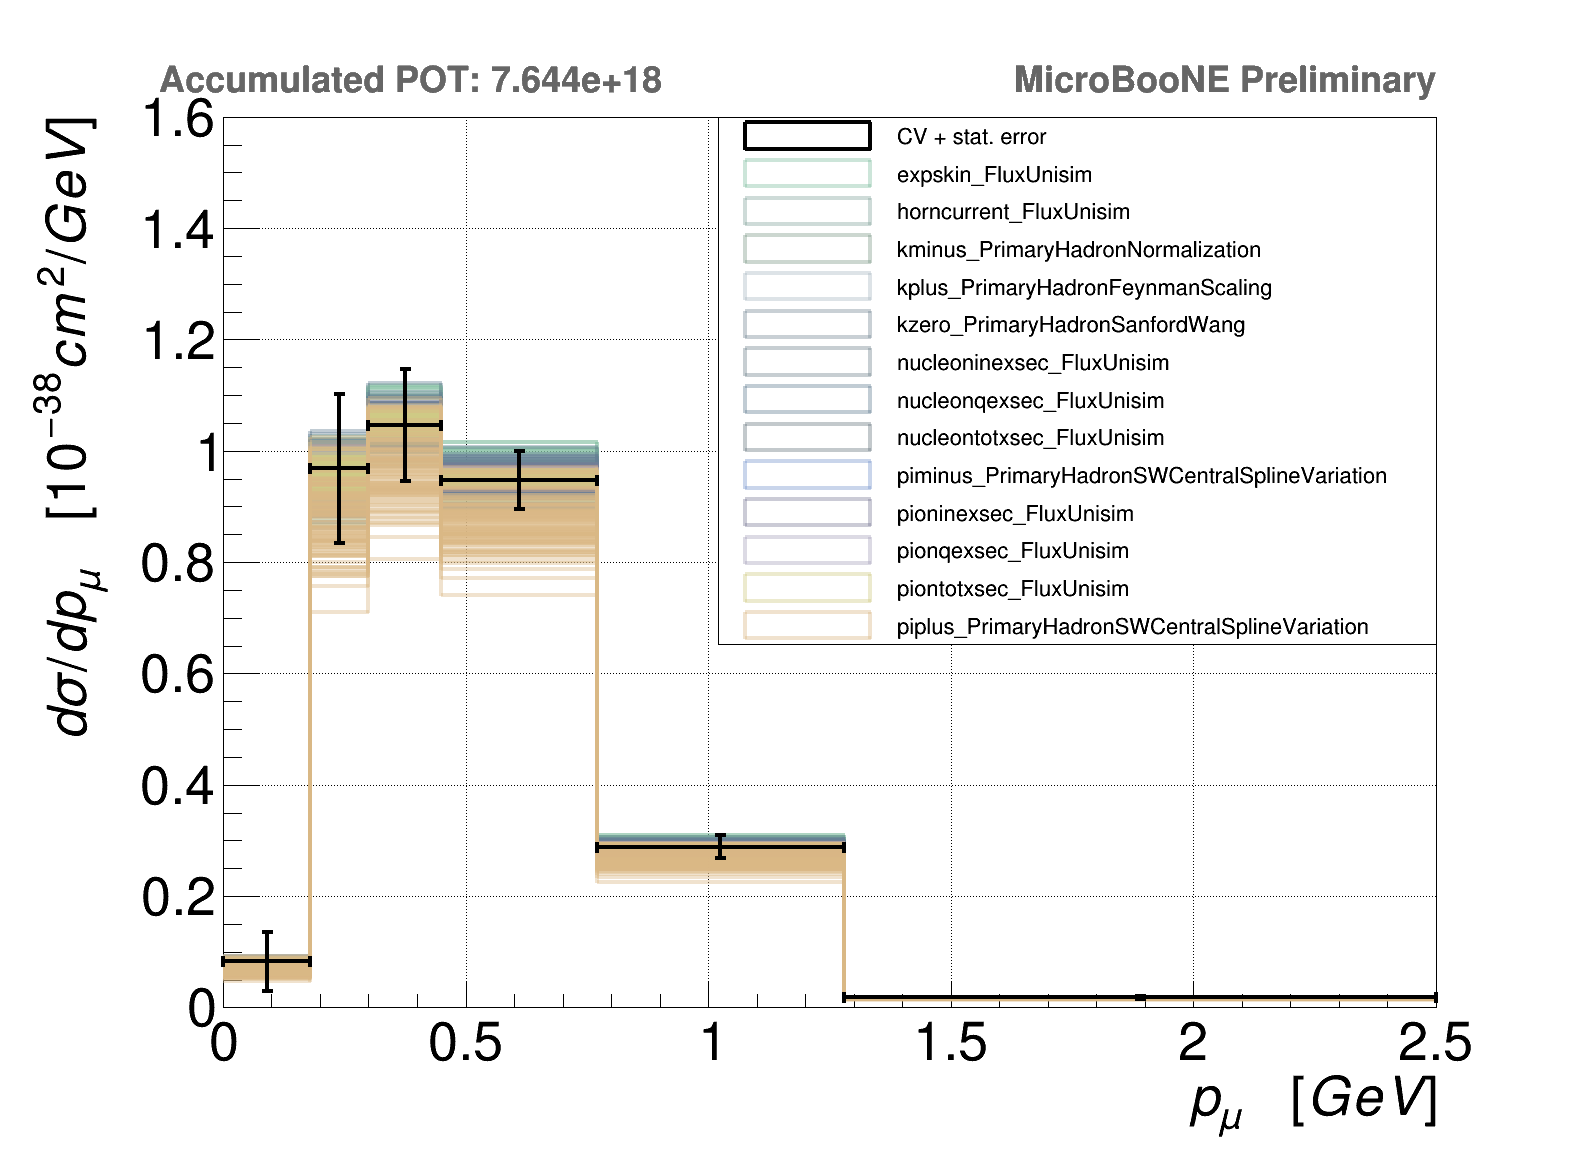

In [38]:

legend = ROOT.TLegend(0.45,0.45,0.9,0.9); #LEGEND RIGHT
#legend = ROOT.TLegend(0.15,0.65,0.3,0.9) # LEGEND LEFT    weight_list_flux[para]    
   
legend.AddEntry(h_cv,'CV + stat. error',"f")
h_cv.SetLineWidth(4)
h_cv.SetMaximum(1.6)
h_cv.SetLineColor(ROOT.kBlack)
h_cv.SetYTitle("d\sigma / d p_{\mu} \t [10^{-38} cm^{2}/GeV]")
h_cv.SetXTitle("p_{\mu} \t [GeV]")
h_cv.GetYaxis().SetTitleSize(0.05)
h_cv.GetYaxis().SetTitleOffset(0.0)
h_cv.GetYaxis().SetLabelSize(0.05)
h_cv.GetXaxis().SetTitleSize(0.05)
h_cv.GetXaxis().SetLabelSize(0.05)
h_cv.GetXaxis().SetTitleOffset(1)
c1.SetRightMargin(0.1)
h_cv.Draw('HIST')
for para in range(num_para):
    for uni in range(num_universes):   
        h_1d_xsec[para][uni].SetLineColorAlpha(para+30,0.4)
        h_1d_xsec[para][uni].SetLineWidth(4)
        h_1d_xsec[para][uni].Draw('HIST same ')
    legend.AddEntry(h_1d_xsec[para][uni],weight_list_flux[para],"f")
legend.Draw()
h_cv.Draw('E1 same')
h_stat = h_cv.Clone()
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_flux_stat_error.png")
c1.SaveAs(outputdir_root + "h_xsec_flux_stat_error.root")
c1.SaveAs(outputdir_pdf + "h_xsec_flux_stat_error.pdf")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/png/h_xsec_flux_stat_error_2d.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/root/h_xsec_flux_stat_error_2d.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/pdf/h_xsec_flux_stat_error_2d.pdf has been created


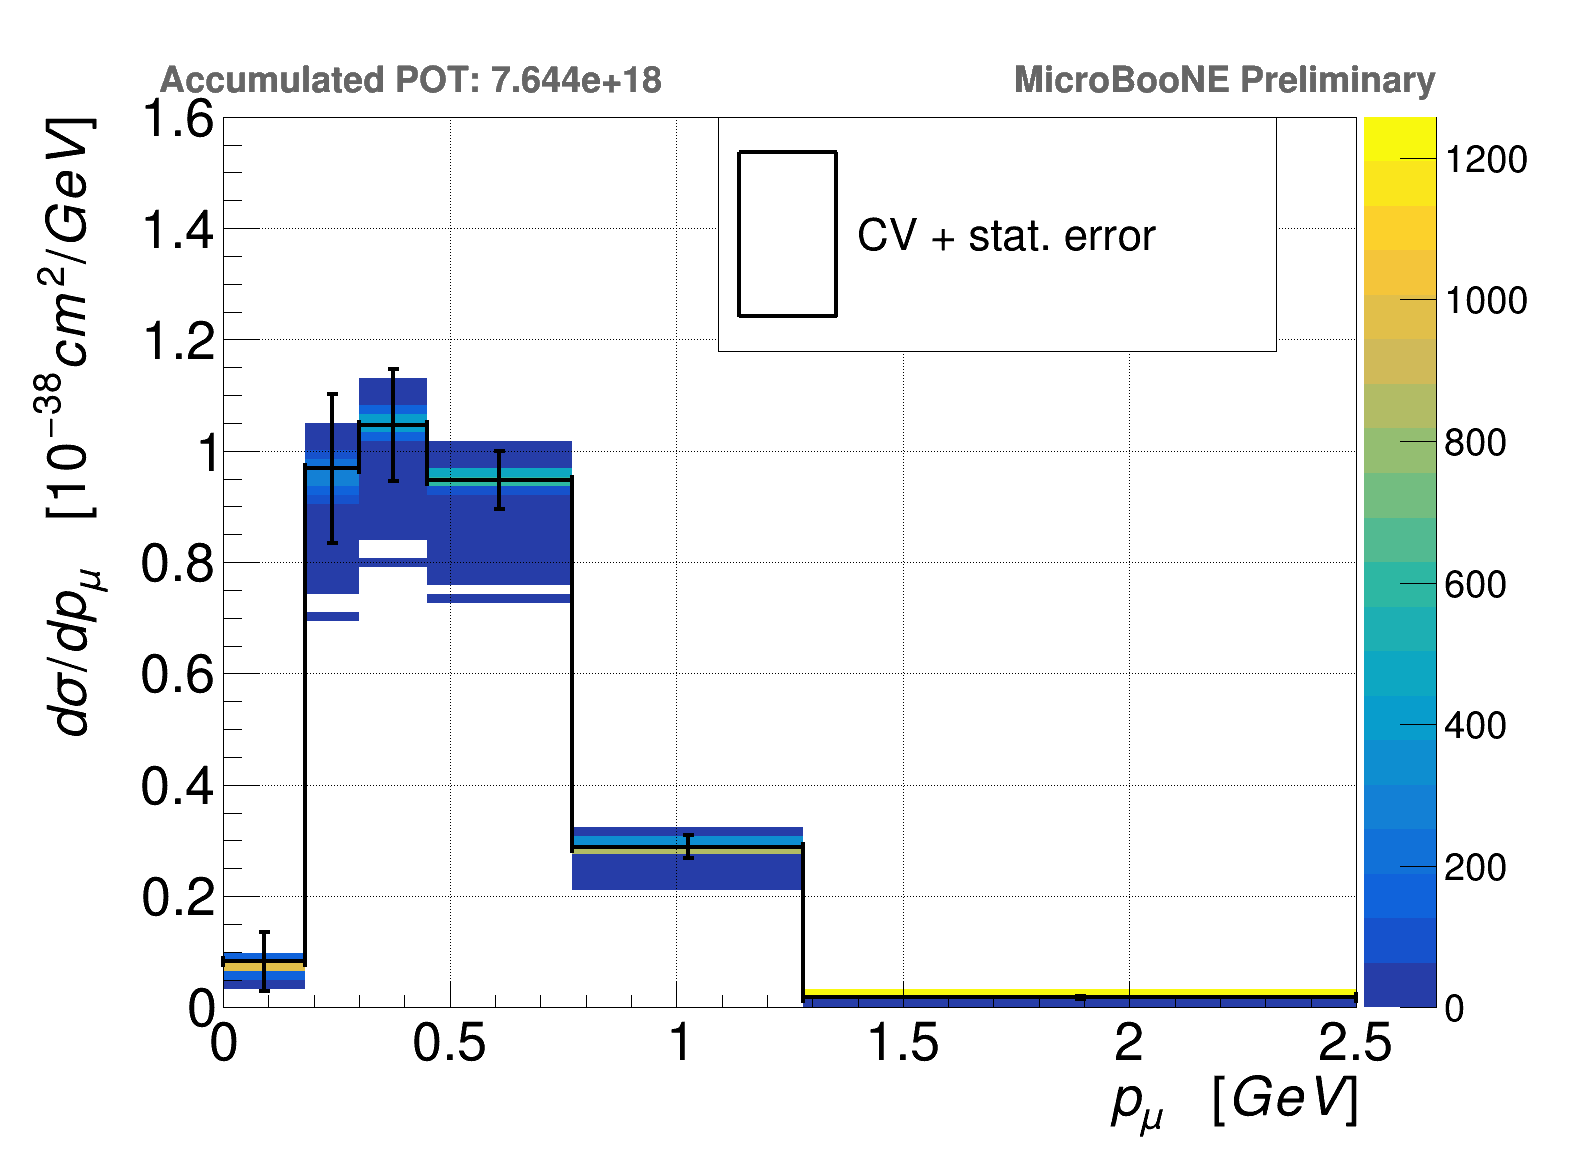

In [39]:
legend = ROOT.TLegend(0.45,0.7,0.8,0.9); #LEGEND RIGHT
#legend = ROOT.TLegend(0.15,0.65,0.3,0.9) # LEGEND LEFT    weight_list_flux[para]    
legend.AddEntry(h_cv,'CV + stat. error',"f")
h_cv.Draw('HIST')
xbin = binnum
xstart = 0.0
xend = 10.0/5
ybin = 100
ystart = 0.0
yend = 1.6
c1.SetRightMargin(0.15)
y = np.arange(ystart, yend+(yend-ystart)/(ybin-1), (yend-ystart)/(ybin-1) ).tolist()
#print y
xaxis = h_cv.GetXaxis()
h_col2 = ROOT.TH2D('h_col2','h_col2',binnum,array('f',mom_bins),ybin-1,array('f',y))
h_col2.SetYTitle("d\sigma / d p_{\mu} \t [10^{-38} cm^{2}/GeV]")
h_col2.SetXTitle("p_{\mu} \t [GeV]")
h_col2.GetYaxis().SetTitleSize(0.05)
h_col2.GetYaxis().SetTitleOffset(0.0)
h_col2.GetYaxis().SetLabelSize(0.05)
h_col2.GetXaxis().SetTitleSize(0.05)
h_col2.GetXaxis().SetLabelSize(0.05)
h_col2.GetXaxis().SetTitleOffset(1)
for para in range(num_para):
    for uni in range(num_universes):   
        for i in range(1,binnum+1):
            h_col2.Fill(h_cv.GetXaxis().GetBinCenter(i),h_1d_xsec[para][uni].GetBinContent(i))
            #print i,h_cv.GetXaxis().GetBinCenter(i), h_1d_xsec[para][uni].GetBinContent(i)
h_col2.Draw('colz')
legend.Draw()
c1.SetLogz(0)
h_cv.Draw('hist E1 same') 
#h_stat.SetLineColor(ROOT.kBlack)
#h_stat.Draw('hist E1 same')
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_flux_stat_error_2d.png")
c1.SaveAs(outputdir_root + "h_xsec_flux_stat_error_2d.root")
c1.SaveAs(outputdir_pdf + "h_xsec_flux_stat_error_2d.pdf")

0.0018295692037435048 0.0427734637801
0.024003566986555248 0.15493084582
0.013809671256097075 0.117514557635
0.009510756296373196 0.0975231064742
0.0008814114518002203 0.0296885744319
3.8109267955640114e-06 0.00195215952103


Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/png/h_xsec_flux_sys_error.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/root/h_xsec_flux_sys_error.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/pdf/h_xsec_flux_sys_error.pdf has been created


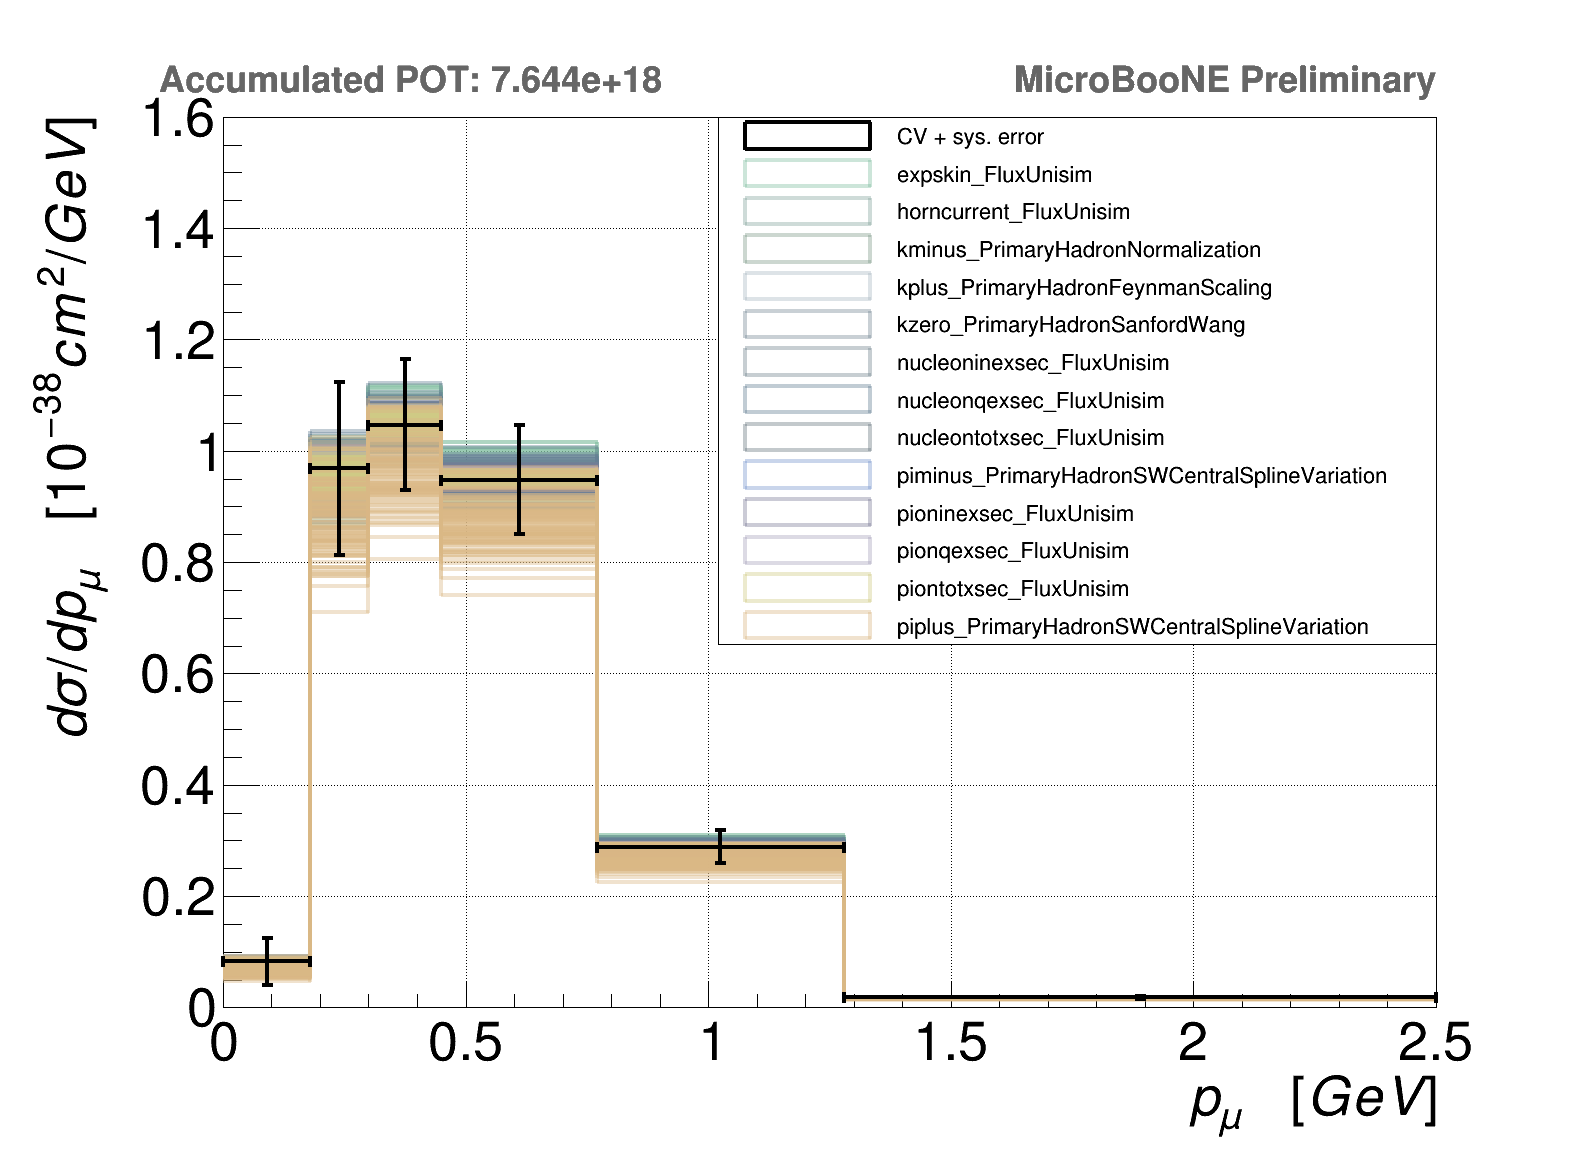

In [40]:

legend = ROOT.TLegend(0.45,0.45,0.9,0.9); #LEGEND RIGHT
#legend = ROOT.TLegend(0.15,0.65,0.3,0.9) # LEGEND LEFT    weight_list_flux[para]    
   
legend.AddEntry(h_cv,'CV + sys. error',"f")

h_cv.Draw('HIST')
for para in range(num_para):
    for uni in range(num_universes):   
        h_1d_xsec[para][uni].Draw('HIST same ')
    legend.AddEntry(h_1d_xsec[para][uni],weight_list_flux[para],"f")
for i in range(binnum):
    h_cv.SetBinError(i+1,math.sqrt(xsec_cov_matrix[i][i]))
    print xsec_cov_matrix[i][i], math.sqrt(xsec_cov_matrix[i][i])
    #print xsec_cov_matrix[i][i]
c1.SetRightMargin(0.1)
legend.Draw()
h_cv.Draw('E1 same')
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_flux_sys_error.png")
c1.SaveAs(outputdir_root + "h_xsec_flux_sys_error.root")
c1.SaveAs(outputdir_pdf + "h_xsec_flux_sys_error.pdf")

Warning in <TFile::Append>: Replacing existing TH1: h_col2 (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/png/h_xsec_flux_sys_error_2d.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/root/h_xsec_flux_sys_error_2d.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/pdf/h_xsec_flux_sys_error_2d.pdf has been created


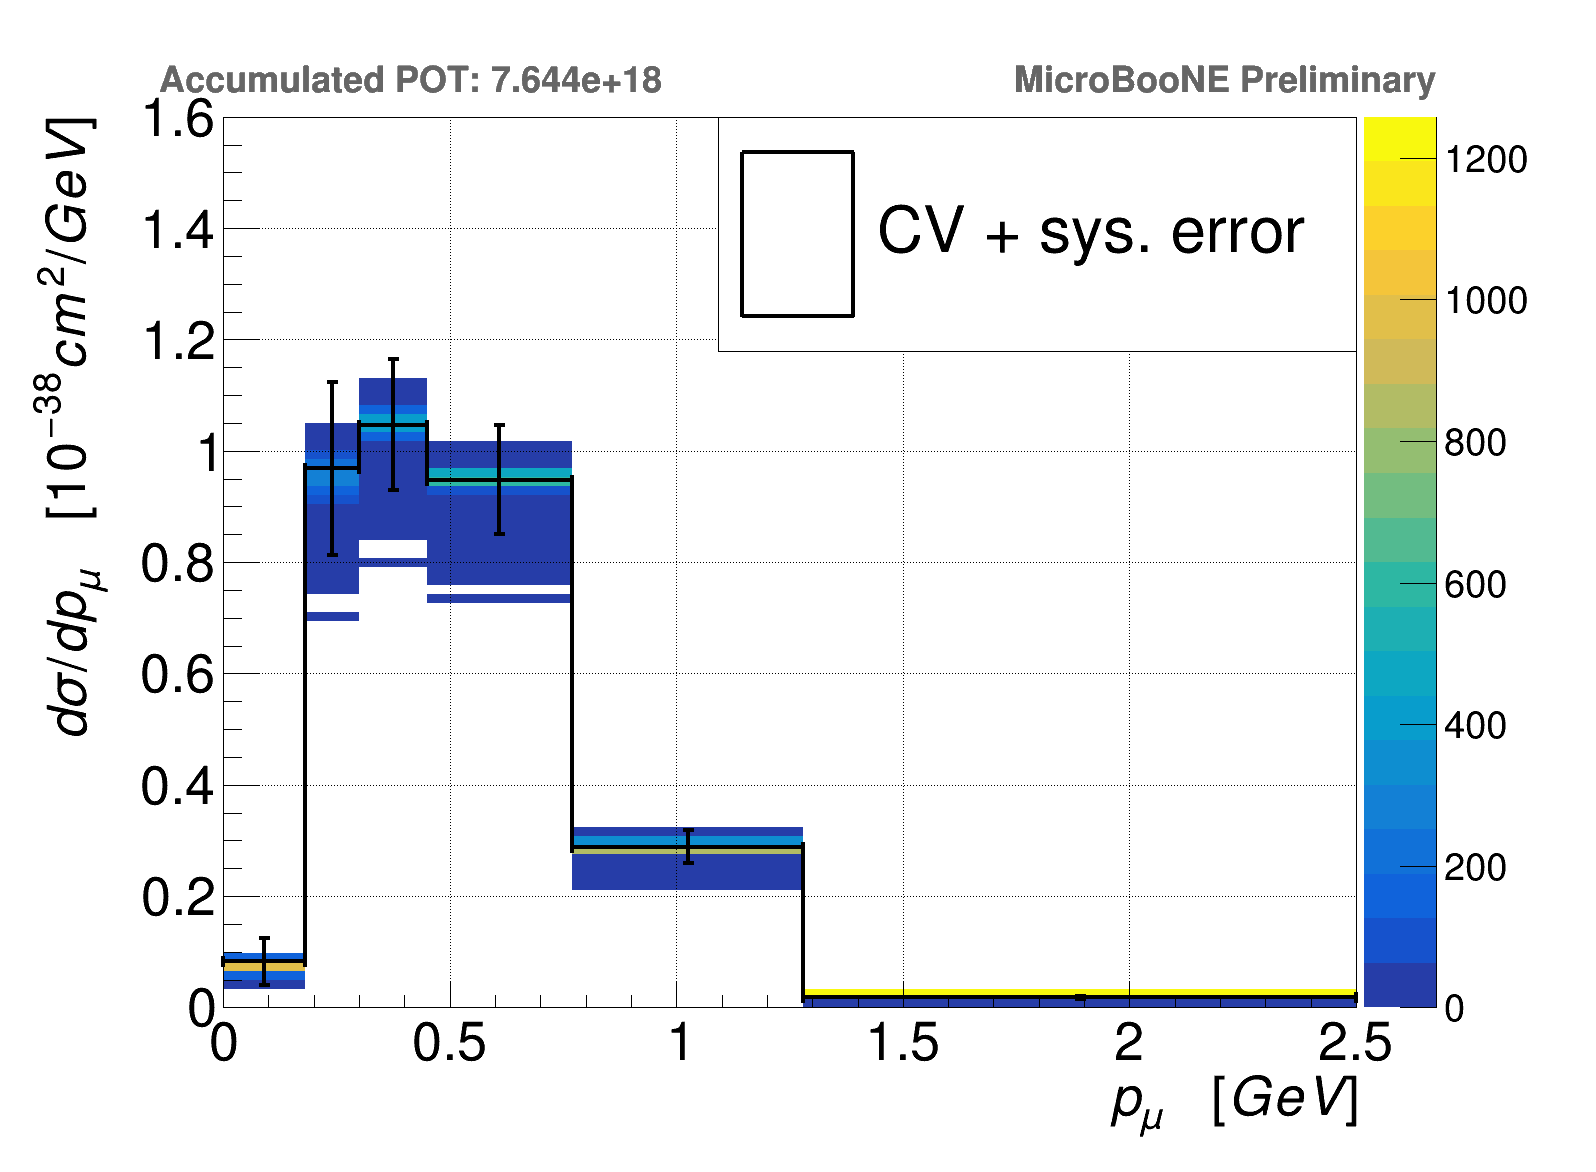

In [41]:
legend = ROOT.TLegend(0.45,0.7,0.85,0.9); #LEGEND RIGHT
#legend = ROOT.TLegend(0.15,0.65,0.3,0.9) # LEGEND LEFT    weight_list_flux[para]    
legend.AddEntry(h_cv,'CV + sys. error',"f")
h_cv.Draw('HIST')
xbin = binnum
xstart = 0.0
xend = 10.0/5
ybin = 100
ystart = 0.0
yend = 1.6

y = np.arange(ystart, yend+(yend-ystart)/(ybin-1), (yend-ystart)/(ybin-1) ).tolist()
#print y
xaxis = h_cv.GetXaxis()
h_col2 = ROOT.TH2D('h_col2','h_col2',binnum,array('f',mom_bins),ybin-1,array('f',y))
h_col2.SetYTitle("d\sigma / d p_{\mu} \t [10^{-38} cm^{2}/GeV]")
h_col2.SetXTitle("p_{\mu} \t [GeV]")
h_col2.GetYaxis().SetTitleSize(0.05)
h_col2.GetYaxis().SetTitleOffset(0.0)
h_col2.GetYaxis().SetLabelSize(0.05)
h_col2.GetXaxis().SetTitleSize(0.05)
h_col2.GetXaxis().SetLabelSize(0.05)
h_col2.GetXaxis().SetTitleOffset(1)
for para in range(num_para):
    for uni in range(num_universes):   
        for i in range(1,binnum+1):
            h_col2.Fill(h_cv.GetXaxis().GetBinCenter(i),h_1d_xsec[para][uni].GetBinContent(i))
            #print i,h_cv.GetXaxis().GetBinCenter(i), h_1d_xsec[para][uni].GetBinContent(i)
h_col2.Draw('colz')
c1.SetLogz(0)
legend.Draw()
c1.SetRightMargin(0.15)
h_cv.Draw('hist E1 same') 
#h_stat.SetLineColor(ROOT.kBlack)
#h_stat.Draw('hist E1 same')
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_flux_sys_error_2d.png")
c1.SaveAs(outputdir_root + "h_xsec_flux_sys_error_2d.root")
c1.SaveAs(outputdir_pdf + "h_xsec_flux_sys_error_2d.pdf")

Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/png/h_xsec_flux_tot_error.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/root/h_xsec_flux_tot_error.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/pdf/h_xsec_flux_tot_error.pdf has been created


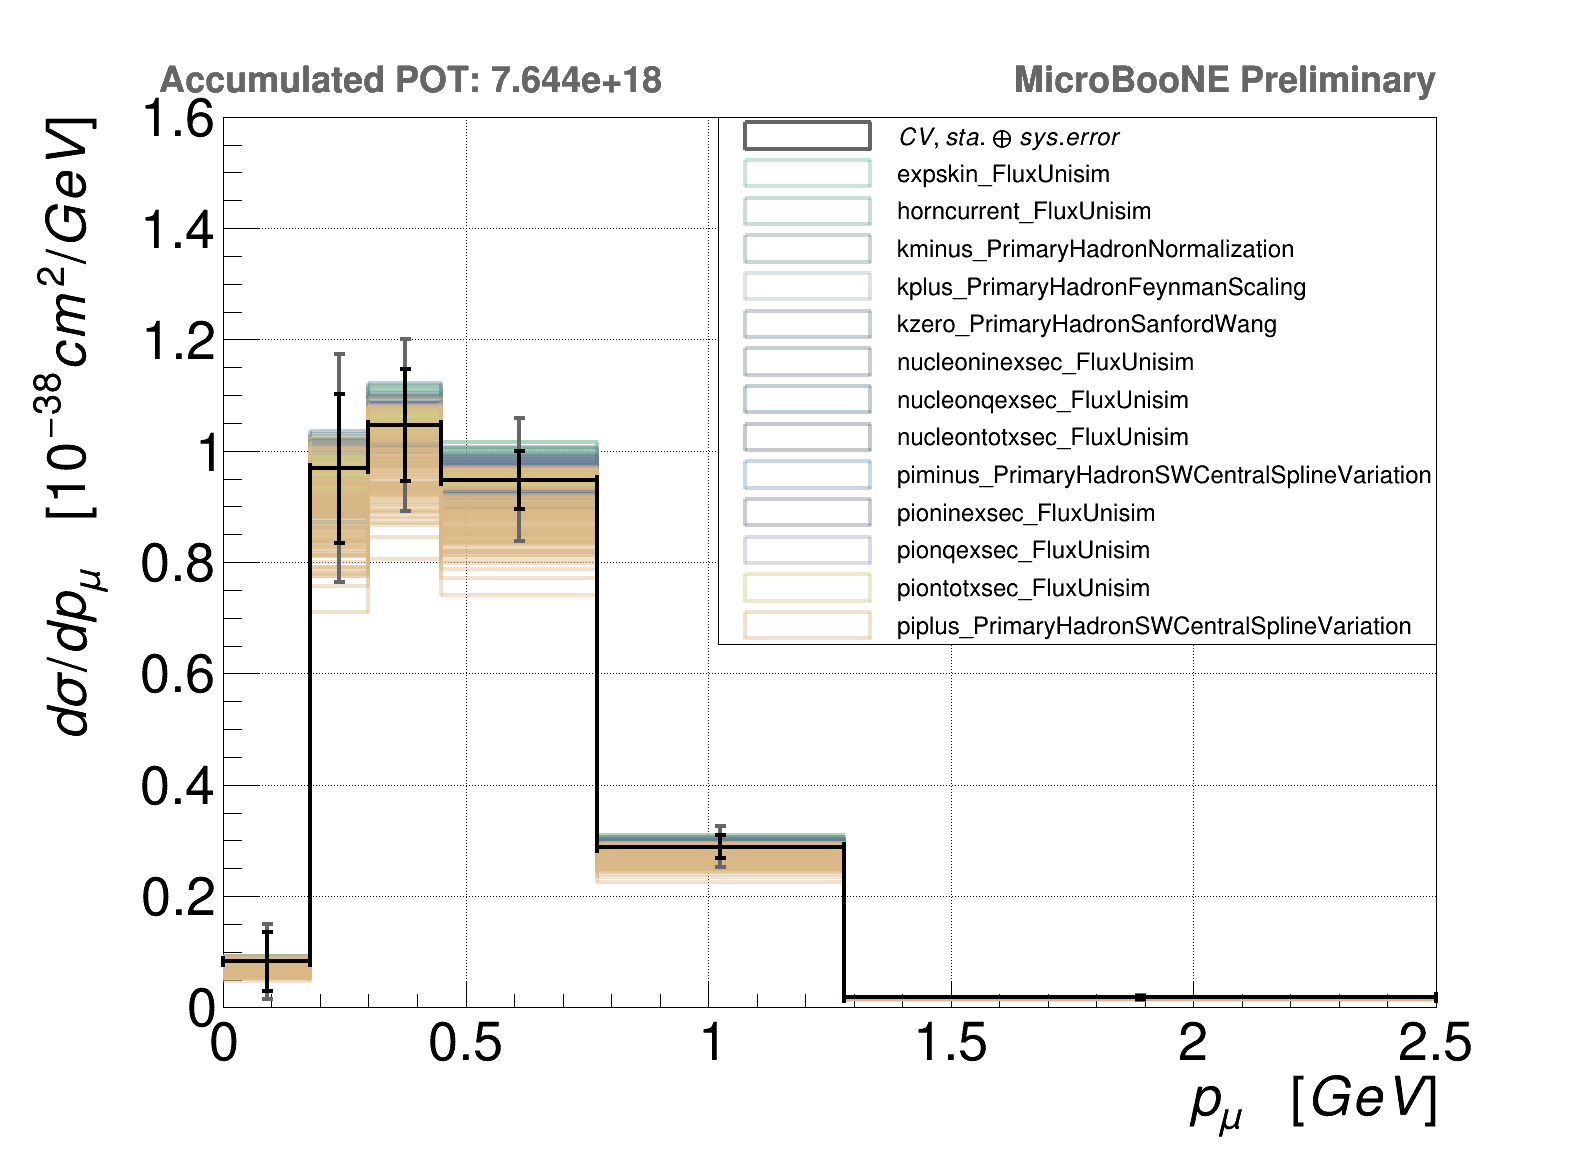

In [42]:
legend = ROOT.TLegend(0.45,0.45,0.9,0.9); #LEGEND RIGHT
#legend = ROOT.TLegend(0.15,0.65,0.3,0.9) # LEGEND LEFT    weight_list_flux[para]    
   
legend.AddEntry(h_cv,'CV, sta. \oplus sys. error',"f")

h_cv.Draw('HIST')
for para in range(num_para):
    for uni in range(num_universes):   
        h_1d_xsec[para][uni].Draw('HIST same ')
    legend.AddEntry(h_1d_xsec[para][uni],weight_list_flux[para],"f")
for i in range(binnum):
    h_cv.SetBinError(i+1,math.sqrt(xsec_cov_matrix[i][i]+math.pow(h_stat.GetBinError(i+1),2)))
    #h_cv.SetBinError(i+1,math.sqrt(xsec_cov_matrix[i][i]))
    #print xsec_cov_matrix[i][i], math.sqrt(xsec_cov_matrix[i][i])
    #print xsec_cov_matrix[i][i]
h_cv.SetLineColor(ROOT.kGray+2)
legend.Draw()
c1.SetRightMargin(0.1)
h_cv.Draw('hist E1 same') 
h_stat.SetLineColor(ROOT.kBlack)
h_stat.Draw('hist E1 same')
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_flux_tot_error.png")
c1.SaveAs(outputdir_root + "h_xsec_flux_tot_error.root")
c1.SaveAs(outputdir_pdf + "h_xsec_flux_tot_error.pdf")

Warning in <TFile::Append>: Replacing existing TH1: h_col2 (Potential memory leak).
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/png/h_xsec_flux_tot_error_2d.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/root/h_xsec_flux_tot_error_2d.root has been created
Info in <TCanvas::Print>: pdf file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted_improved/xsec_momentum_flux/pdf/h_xsec_flux_tot_error_2d.pdf has been created


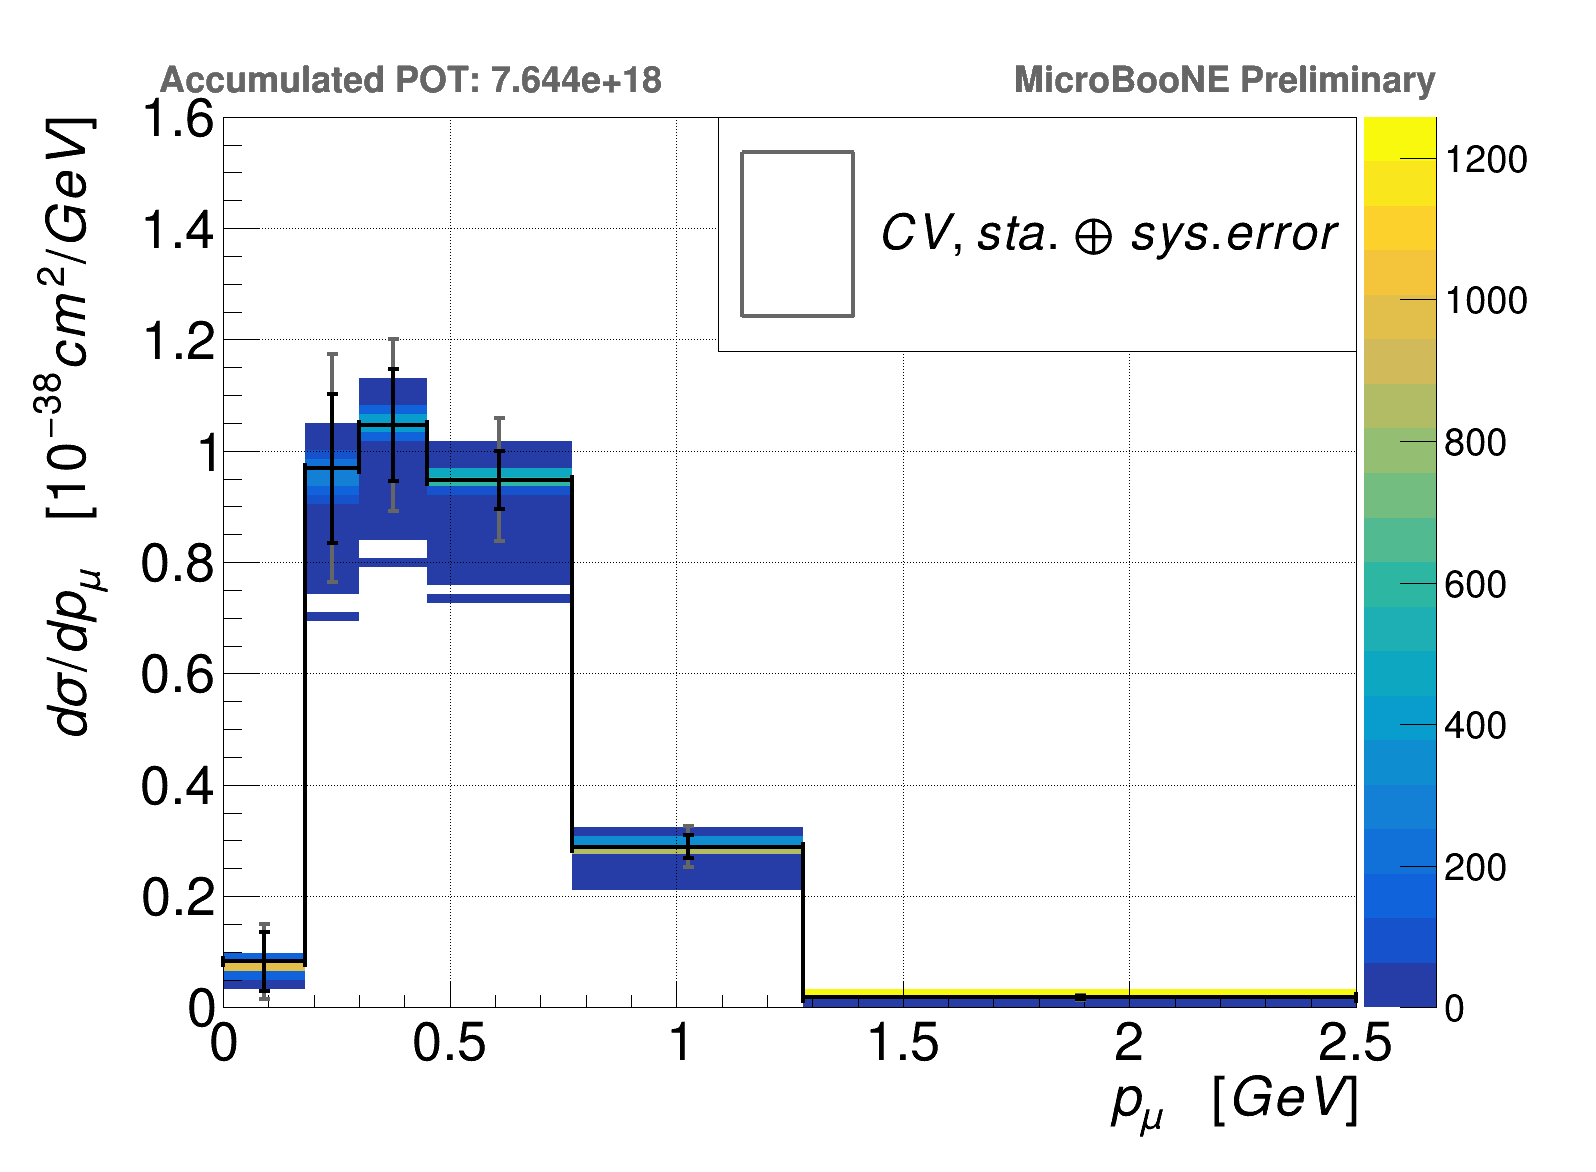

In [43]:
legend = ROOT.TLegend(0.45,0.7,0.85,0.9); #LEGEND RIGHT
#legend = ROOT.TLegend(0.15,0.65,0.3,0.9) # LEGEND LEFT    weight_list_flux[para]    
legend.AddEntry(h_cv,'CV, sta. \oplus sys. error',"f")
h_cv.Draw('HIST')
xbin = binnum
xstart = 0.0
xend = 10.0/5
ybin = 100
ystart = 0.0
yend = 1.6

y = np.arange(ystart, yend+(yend-ystart)/(ybin-1), (yend-ystart)/(ybin-1) ).tolist()
#print y
xaxis = h_cv.GetXaxis()
h_col2 = ROOT.TH2D('h_col2','h_col2',binnum,array('f',mom_bins),ybin-1,array('f',y))
h_col2.SetYTitle("d\sigma / d p_{\mu} \t [10^{-38} cm^{2}/GeV]")
h_col2.SetXTitle("p_{\mu} \t [GeV]")
h_col2.GetYaxis().SetTitleSize(0.05)
h_col2.GetYaxis().SetTitleOffset(0.0)
h_col2.GetYaxis().SetLabelSize(0.05)
h_col2.GetXaxis().SetTitleSize(0.05)
h_col2.GetXaxis().SetLabelSize(0.05)
h_col2.GetXaxis().SetTitleOffset(1)
for para in range(num_para):
    for uni in range(num_universes):   
        for i in range(1,binnum+1):
            h_col2.Fill(h_cv.GetXaxis().GetBinCenter(i),h_1d_xsec[para][uni].GetBinContent(i))
            #print i,h_cv.GetXaxis().GetBinCenter(i), h_1d_xsec[para][uni].GetBinContent(i)
h_col2.Draw('colz')
c1.SetLogz(0)
legend.Draw()
c1.SetRightMargin(0.15)
h_cv.Draw('hist E1 same') 
h_stat.SetLineColor(ROOT.kBlack)
h_stat.Draw('hist E1 same')
prelim, pot_tex = draw_adding()
prelim.Draw()
pot_tex.Draw()
c1.Draw()
c1.SaveAs(outputdir_png + "h_xsec_flux_tot_error_2d.png")
c1.SaveAs(outputdir_root + "h_xsec_flux_tot_error_2d.root")
c1.SaveAs(outputdir_pdf + "h_xsec_flux_tot_error_2d.pdf")

In [44]:
print num_universes

100


In [45]:
RootFile.Close()